<a href="https://colab.research.google.com/github/chaeyeon2367/ml-python-NYCtaxiDemandForecast/blob/main/Data_EDA_Data_Visualization(Time).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Visualization (1)
### NYC New York Taxi Data EDA
- What is the number of calls by time zone?
- How many calls per day?
- Data visualization (seaborn, plotly(cufflinks))
- Using BigQuery on Python

### Import modules

In [1]:
!pip3 install plotly cufflinks pandas numpy seaborn matplotlib pandas-gbq

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.1 MB/s eta 0:00:00


In [5]:
!pip install chart-studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 KB 2.8 MB/s eta 0:00:00


In [35]:
!pip install plotly==3.10.0
from chart_studio import plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 MB 24.3 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cufflinks 0.17.3 requires plotly>=4.1.1, but you have plotly 3.10.0 which is incompatible.


In [44]:
import plotly.graph_objs as go
from plotly.offline import iplot
import chart_studio.plotly as py

# these two lines are what allow your code to show up in a notebook
import plotly.io as pio
pio.renderers.default='colab'

In [40]:
import cufflinks as cf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
print(cf.__version__)

%config InlineBackend.figure_format = 'retina'
cf.go_offline()

0.17.3


In [38]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = 'colab'
from plotly.offline import init_notebook_mode, iplot

In [11]:
from google.colab import auth
auth.authenticate_user()

In [111]:
#Replace 'project_id' with your BigQuery project ID
from google.cloud import bigquery
client = bigquery.Client(project='nyctaxi-demand-forecast')

### Total Trips in January


In [50]:
%%time
sql_query = ('''
SELECT 
    DATETIME_TRUNC(pickup_datetime, hour) as pickup_hour,
    count(*) as cnt
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2015` 
WHERE EXTRACT(MONTH from pickup_datetime) = 1
GROUP BY pickup_hour
ORDER BY pickup_hour''')
df = client.query(sql_query).to_dataframe()

CPU times: user 55.4 ms, sys: 5.91 ms, total: 61.3 ms
Wall time: 2.62 s


In [51]:
df.tail(10)

,pickup_hour,cnt
734,2015-01-31 14:00:00+00:00,25051
735,2015-01-31 15:00:00+00:00,25853
736,2015-01-31 16:00:00+00:00,23813
737,2015-01-31 17:00:00+00:00,25790
738,2015-01-31 18:00:00+00:00,30790
739,2015-01-31 19:00:00+00:00,32426
740,2015-01-31 20:00:00+00:00,27542
741,2015-01-31 21:00:00+00:00,27467
742,2015-01-31 22:00:00+00:00,29856
743,2015-01-31 23:00:00+00:00,29850


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   pickup_hour  744 non-null    datetime64[ns, UTC]
 1   cnt          744 non-null    Int64              
dtypes: Int64(1), datetime64[ns, UTC](1)
memory usage: 12.5 KB


In [53]:
df.head()

,pickup_hour,cnt
0,2015-01-01 00:00:00+00:00,28312
1,2015-01-01 01:00:00+00:00,31707
2,2015-01-01 02:00:00+00:00,28068
3,2015-01-01 03:00:00+00:00,24288
4,2015-01-01 04:00:00+00:00,17081


In [54]:
df['pickup_hour'] = pd.to_datetime(df['pickup_hour'])

In [55]:
df = df.set_index('pickup_hour')

In [57]:
df.iplot?

In [59]:
df.iplot(kind='scatter',xTitle='Datetimes',yTitle='Demand',title='NYC Taxi Demand(2015-01)')

- Jan 27, number of sharp falls at 02:00 2015
  - On January 23, 2015, there was a big snow storm and it snowed 26.8 inches.
  - Significant reduction in total taxi trips
  -[Wikipedia](https://en.wikipedia.org/wiki/January_2015_North_American_blizzard) 

### Number of trips per data

In [65]:
df['date'] = df.index.date

In [66]:
df.groupby(['date'])[['cnt']].sum().iplot()

### Number of Trips by Time Zone by Day of the Week

In [67]:
df.head(2)

,cnt,data,date
pickup_hour,,,
2015-01-01 00:00:00+00:00,28312,2015-01-01,2015-01-01
2015-01-01 01:00:00+00:00,31707,2015-01-01,2015-01-01


In [68]:
df['weekday'] = df.index.weekday
df['hour'] = df.index.hour
df['weeknum'] = df.index.week

In [69]:
df.head()

,cnt,data,date,weekday,hour,weeknum
pickup_hour,,,,,,
2015-01-01 00:00:00+00:00,28312,2015-01-01,2015-01-01,3,0,1
2015-01-01 01:00:00+00:00,31707,2015-01-01,2015-01-01,3,1,1
2015-01-01 02:00:00+00:00,28068,2015-01-01,2015-01-01,3,2,1
2015-01-01 03:00:00+00:00,24288,2015-01-01,2015-01-01,3,3,1
2015-01-01 04:00:00+00:00,17081,2015-01-01,2015-01-01,3,4,1


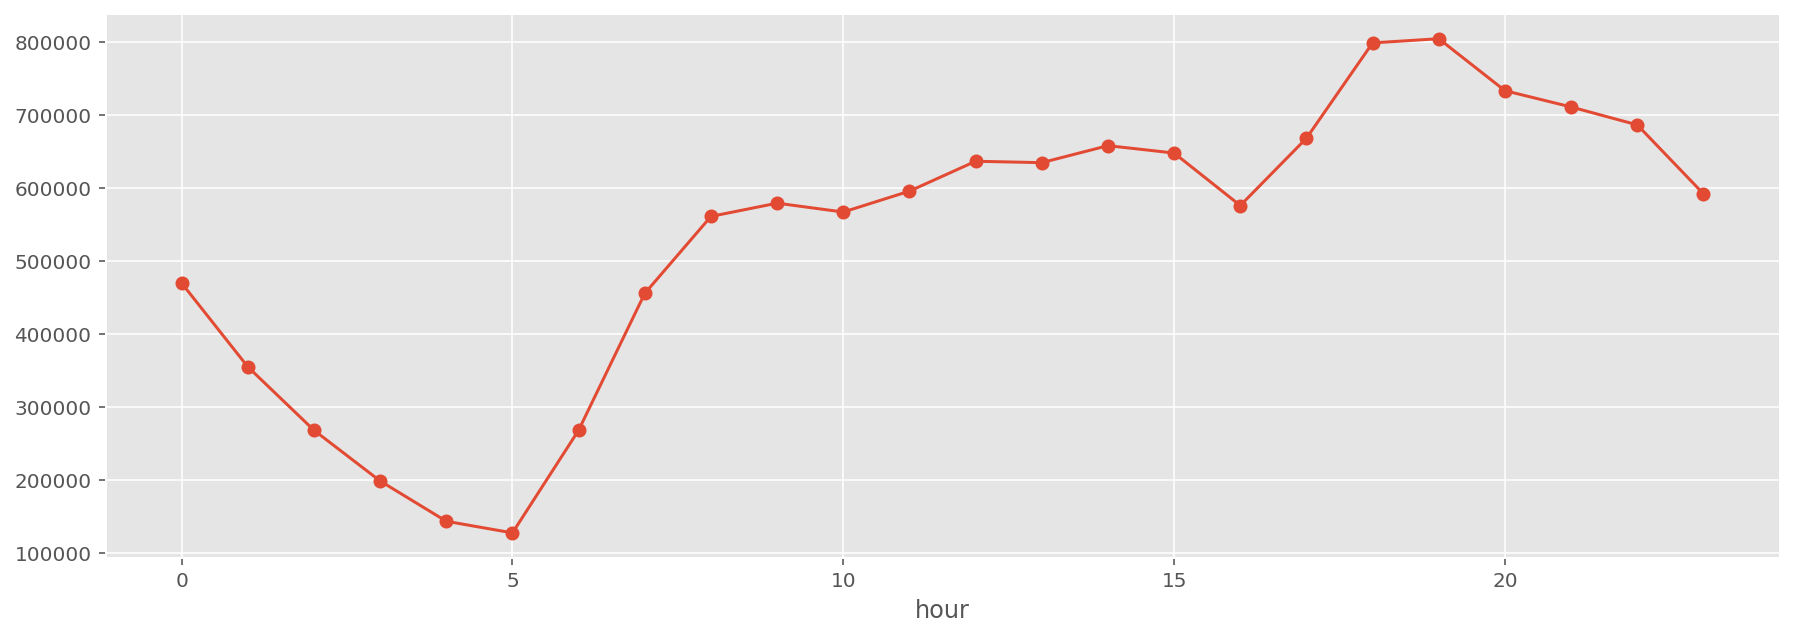

In [70]:
df.groupby('hour')['cnt'].sum().plot(x='hour', y='cnt', kind='line', style="-o", figsize=(15,5));

- Peak : 18~19
- Off-peak : 5

In [71]:
df.groupby(['hour', 'weekday'])['cnt'].mean().unstack()

weekday,0,1,2,3,4,5,6
hour,,,,,,,
0,8550.25,6715.5,8781.5,14321.6,14052.0,25482.6,26096.5
1,5356.5,3703.75,5281.25,11436.2,8780.4,21117.4,22750.25
2,3668.75,2359.75,3335.25,8749.8,5850.8,16379.0,18914.0
3,2725.5,1502.5,2302.75,7027.4,3946.2,12109.6,14222.5
4,2689.0,1629.75,2291.75,5440.8,3340.0,7727.4,8546.5
5,4124.5,3147.0,4047.5,5189.6,4143.4,3907.0,3931.0
6,10043.5,8730.75,11568.0,10911.0,10459.6,4770.0,3982.0
7,16787.0,15803.0,21178.25,18736.6,18183.4,6860.4,5432.5
8,20466.0,19064.25,25195.25,21801.0,21130.0,10852.0,8364.0


In [75]:
df.groupby(['hour', 'weekday'])['cnt'].mean().unstack().iplot()

- Number of trips by weekday

In [81]:
df.groupby('weekday')[['cnt']].mean().iplot(kind='bar')

### Number of Trips by Weekdays/Weekend

In [87]:
df['is_weekend'] = ((pd.DatetimeIndex(df.index).dayofweek) // 5 == 1).astype(int)

In [88]:
df.groupby(['hour', 'is_weekend'])['cnt'].mean().unstack().iplot()

### Heat map by time zone for each day of the week



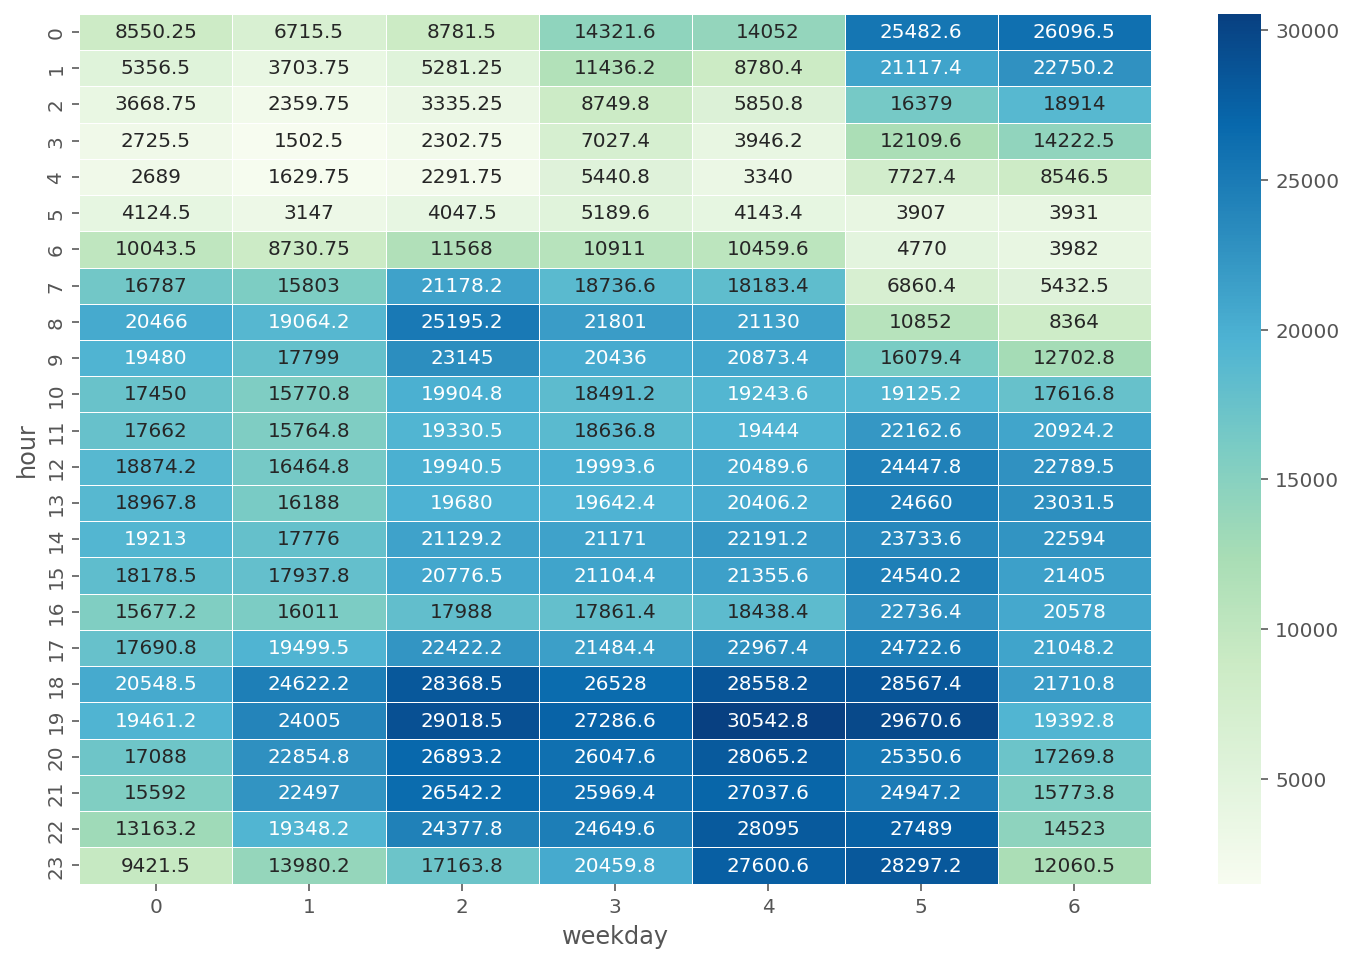

In [91]:
plt.figure(figsize=(12,8))
df['cnt'] = df['cnt'].astype(float) # Convert column 'cnt' to float
sns.heatmap(df.groupby(['hour', 'weekday'])['cnt'].mean().unstack(),
           lw=.5, annot=True, cmap='GnBu', fmt='g', annot_kws={'size':10});


- Call rises from Friday afternoon

In [92]:
average_df = df.groupby(['is_weekend', 'hour']).mean()['cnt'].unstack(level=0).rename(columns={0:"weekday", 1:"weekend"})

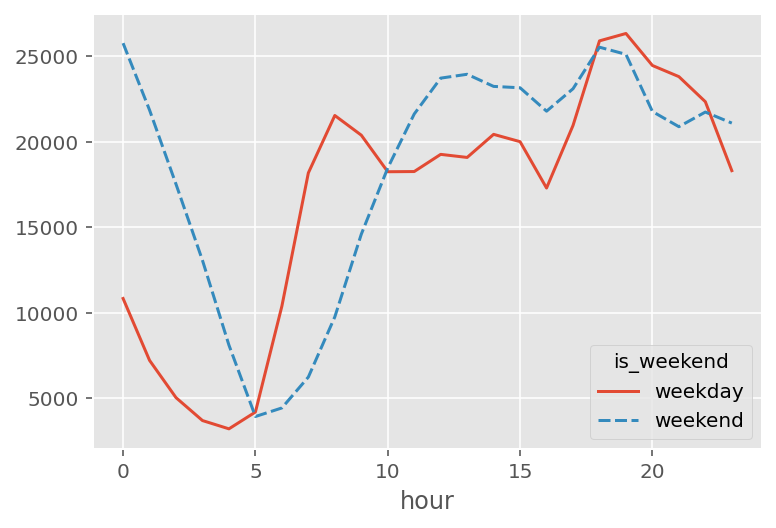

In [93]:
sns.lineplot(data=average_df);

In [94]:
df.head(3)

,cnt,data,date,weekday,hour,weeknum,is_weekend
pickup_hour,,,,,,,
2015-01-01 00:00:00+00:00,28312.0,2015-01-01,2015-01-01,3,0,1,0
2015-01-01 01:00:00+00:00,31707.0,2015-01-01,2015-01-01,3,1,1,0
2015-01-01 02:00:00+00:00,28068.0,2015-01-01,2015-01-01,3,2,1,0


In [95]:
data = df.groupby(['weekday', 'hour']).mean()['cnt'].unstack(level=0).reset_index()
data = data.melt(id_vars="hour", value_vars=[0,1,2,3,4,5,6], value_name='cnt')

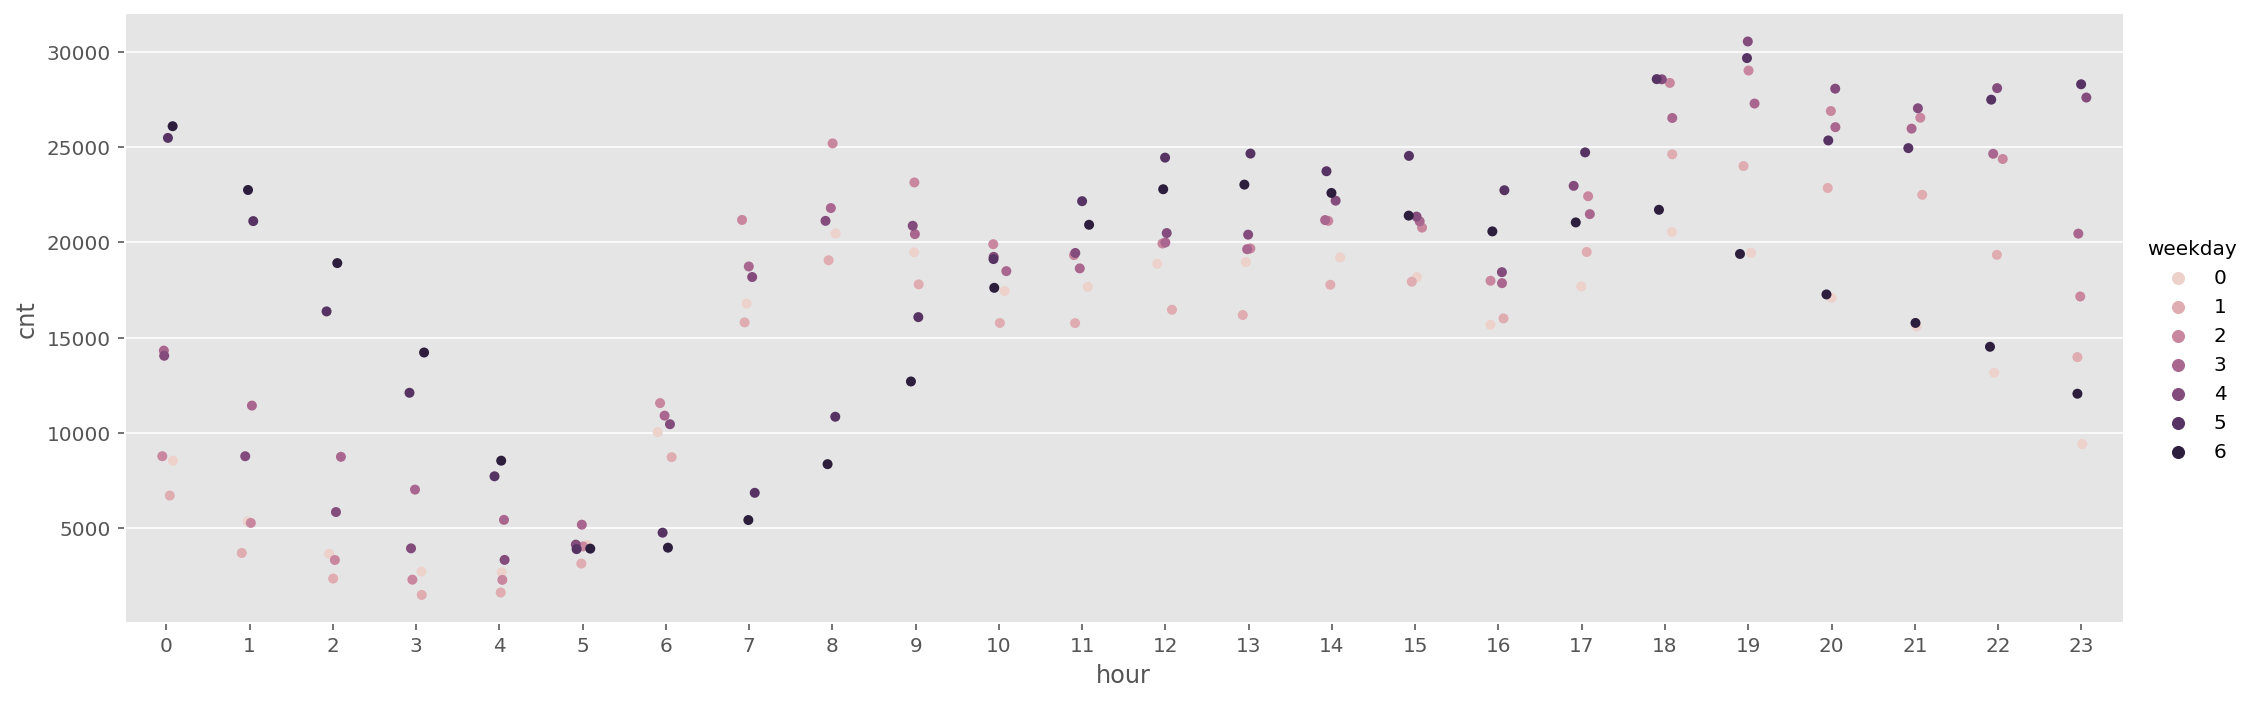

In [98]:
sns.catplot(x="hour", y='cnt', hue="weekday", data=data, height=5, aspect=3);

### Boxplot
- [Understanding Boxplots](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

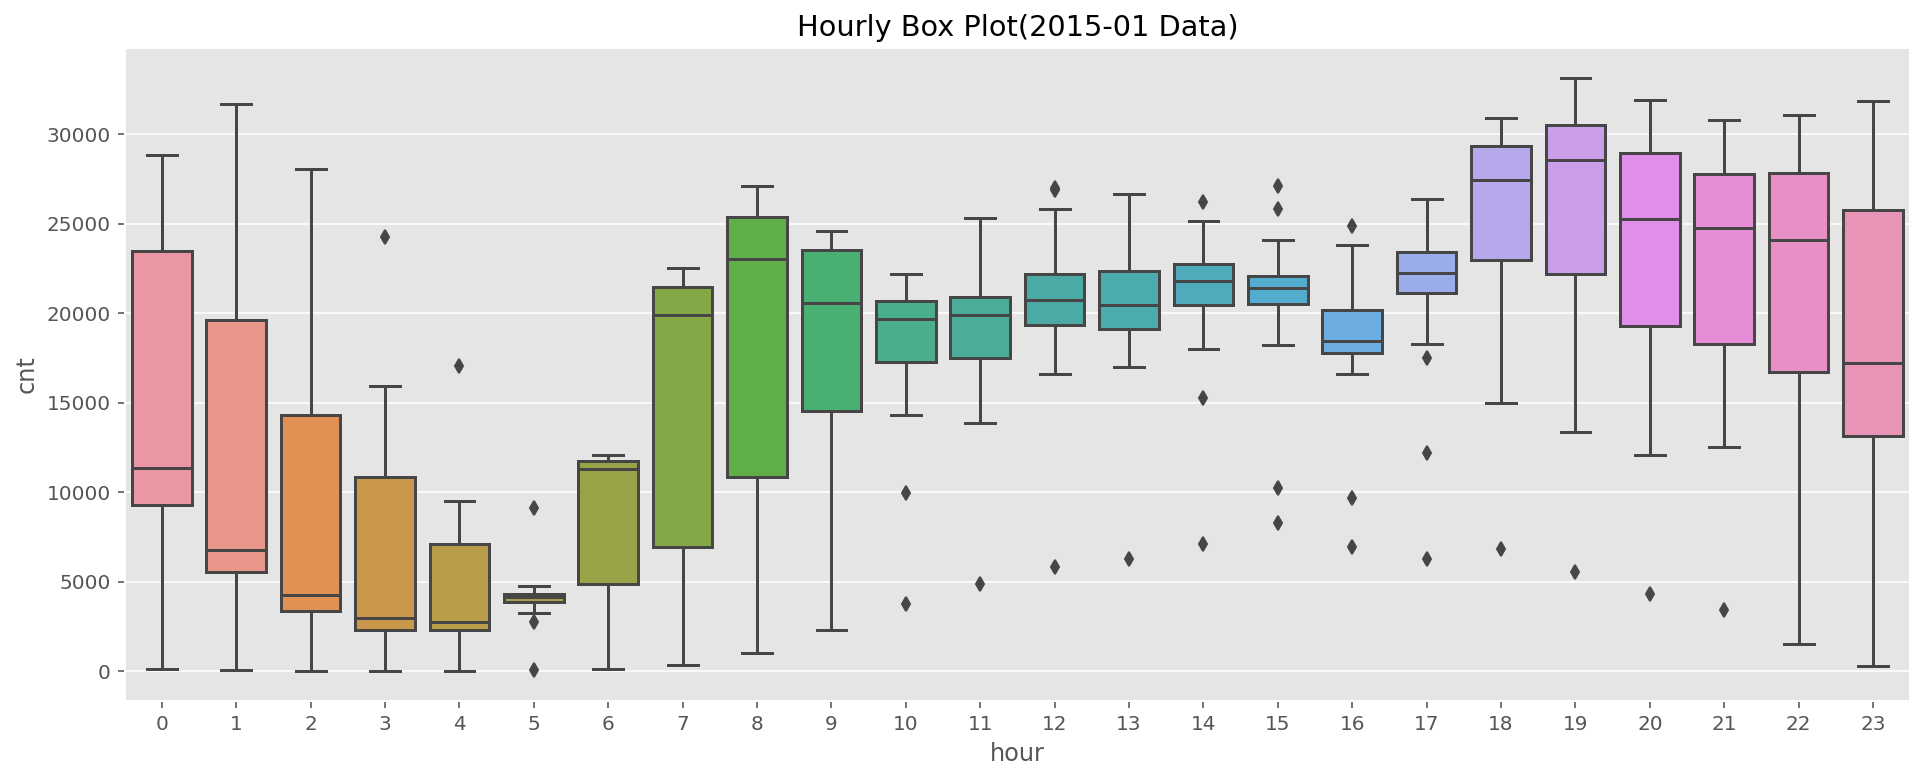

In [99]:
plt.figure(figsize=(16, 6));
sns.boxplot(x='hour', y='cnt', data=df);
plt.title("Hourly Box Plot(2015-01 Data)");

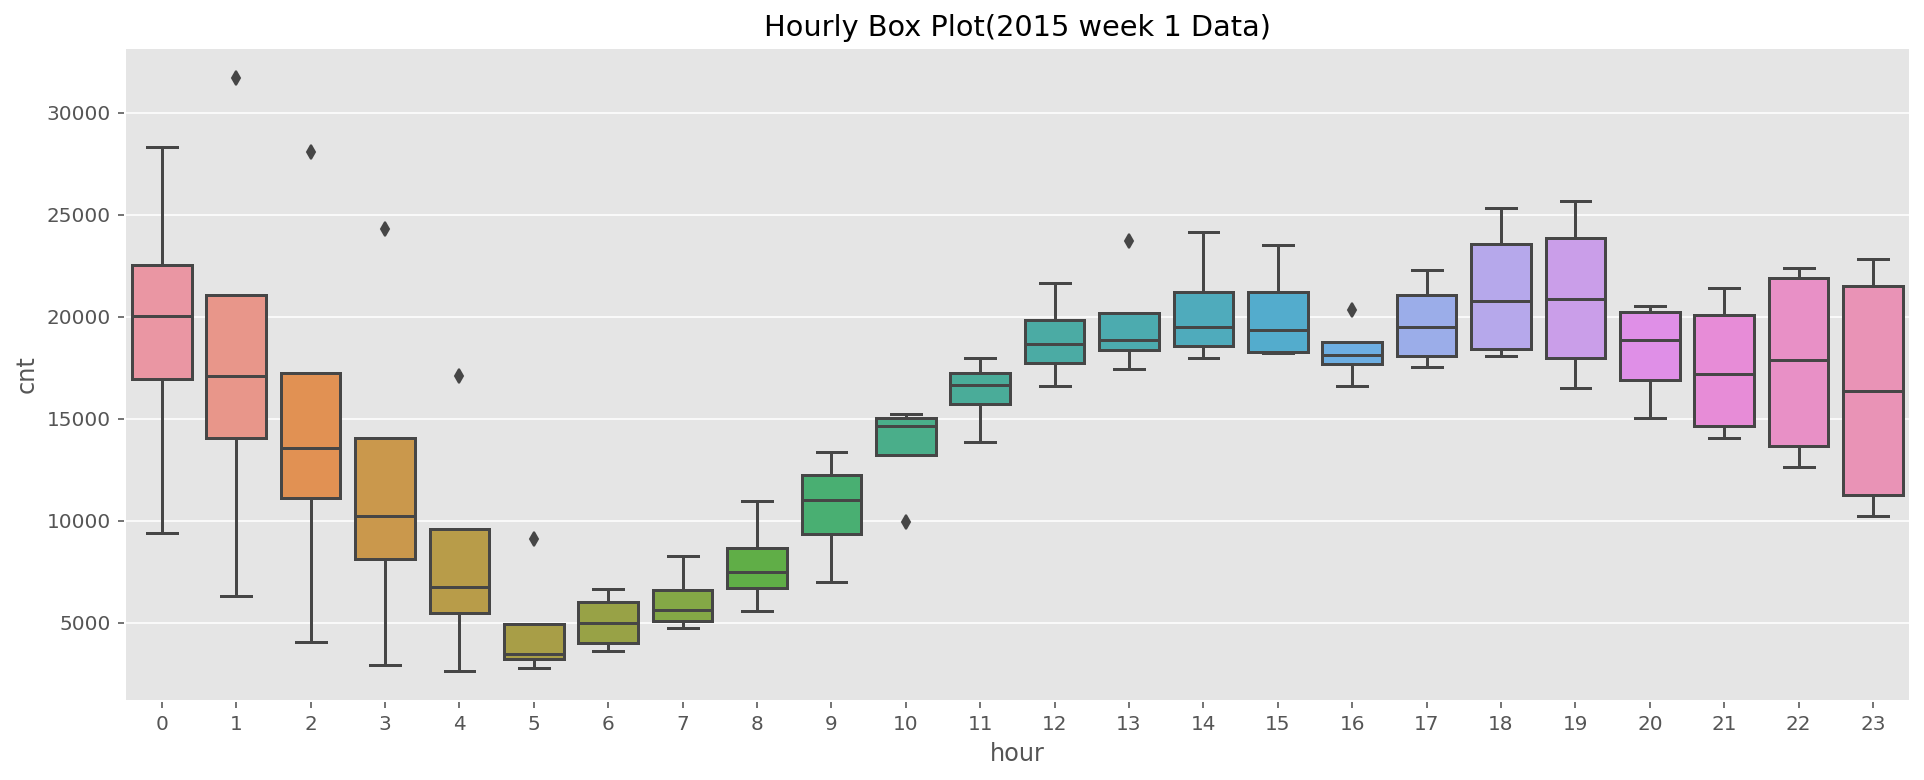

In [100]:
plt.figure(figsize=(16, 6));
sns.boxplot(x='hour', y='cnt', data=df[df['weeknum']==1]);
plt.title("Hourly Box Plot(2015 week 1 Data)");

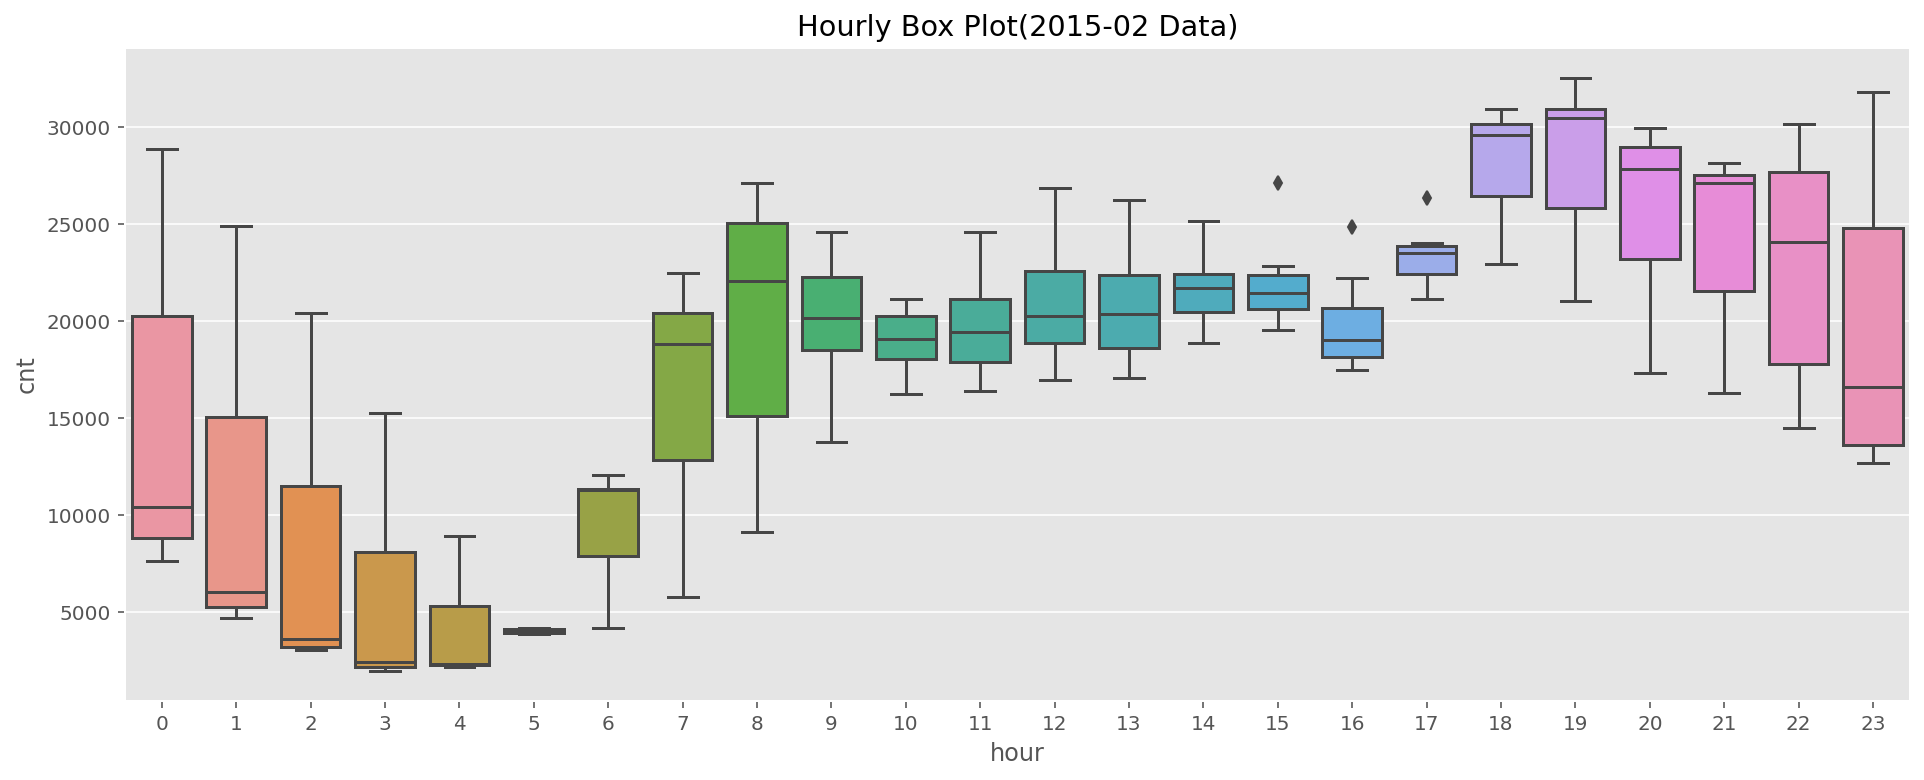

In [101]:
plt.figure(figsize=(16, 6));
sns.boxplot(x='hour', y='cnt', data=df[df['weeknum']==2]);
plt.title("Hourly Box Plot(2015-02 Data)");

In [102]:
def visualize_hourly_boxplot_by_weeknum(df, y, weeknum):
    plt.figure(figsize=(16, 6));
    sns.boxplot(x='hour', y=y, data=df[df['weeknum']==weeknum]);
    plt.title(f"Hourly Box Plot(2015-{weeknum:02} Data)");

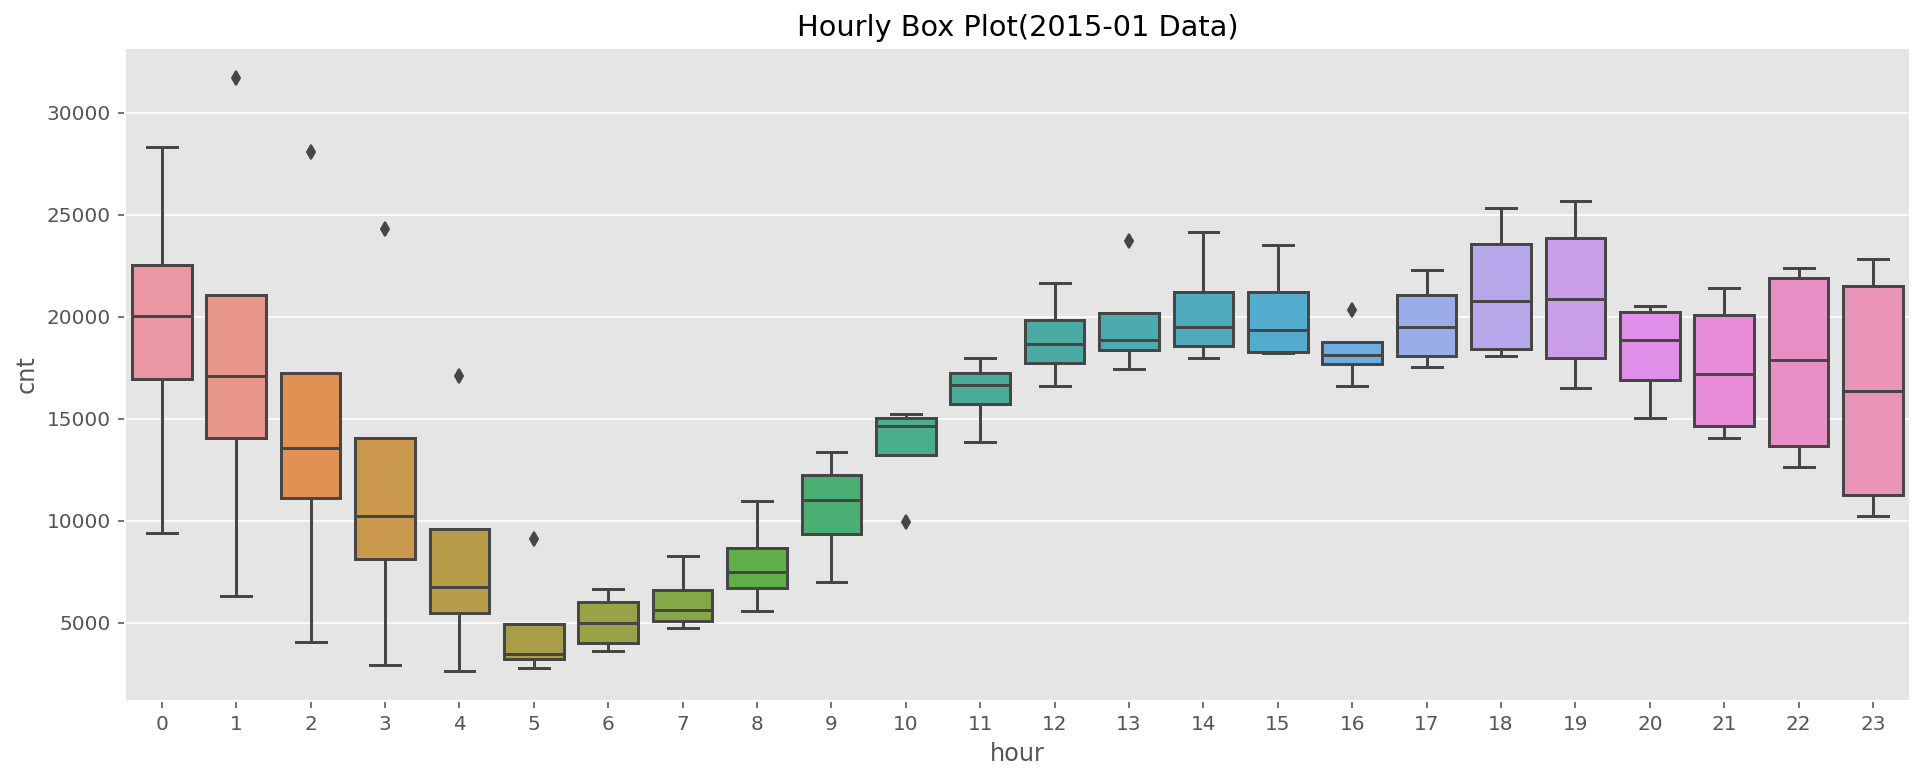

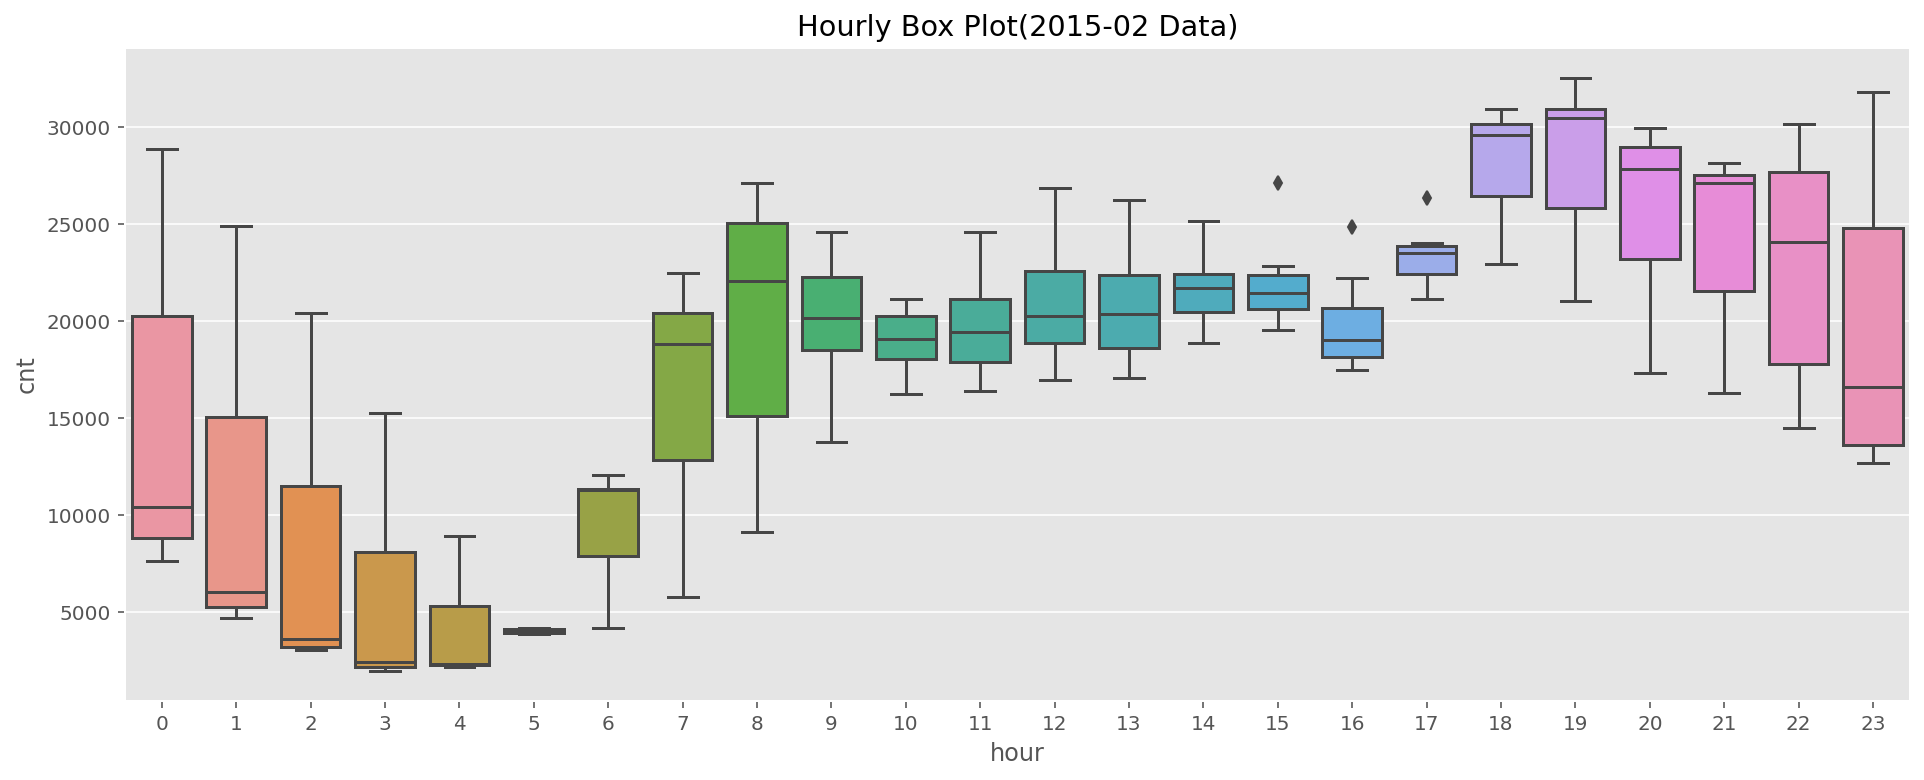

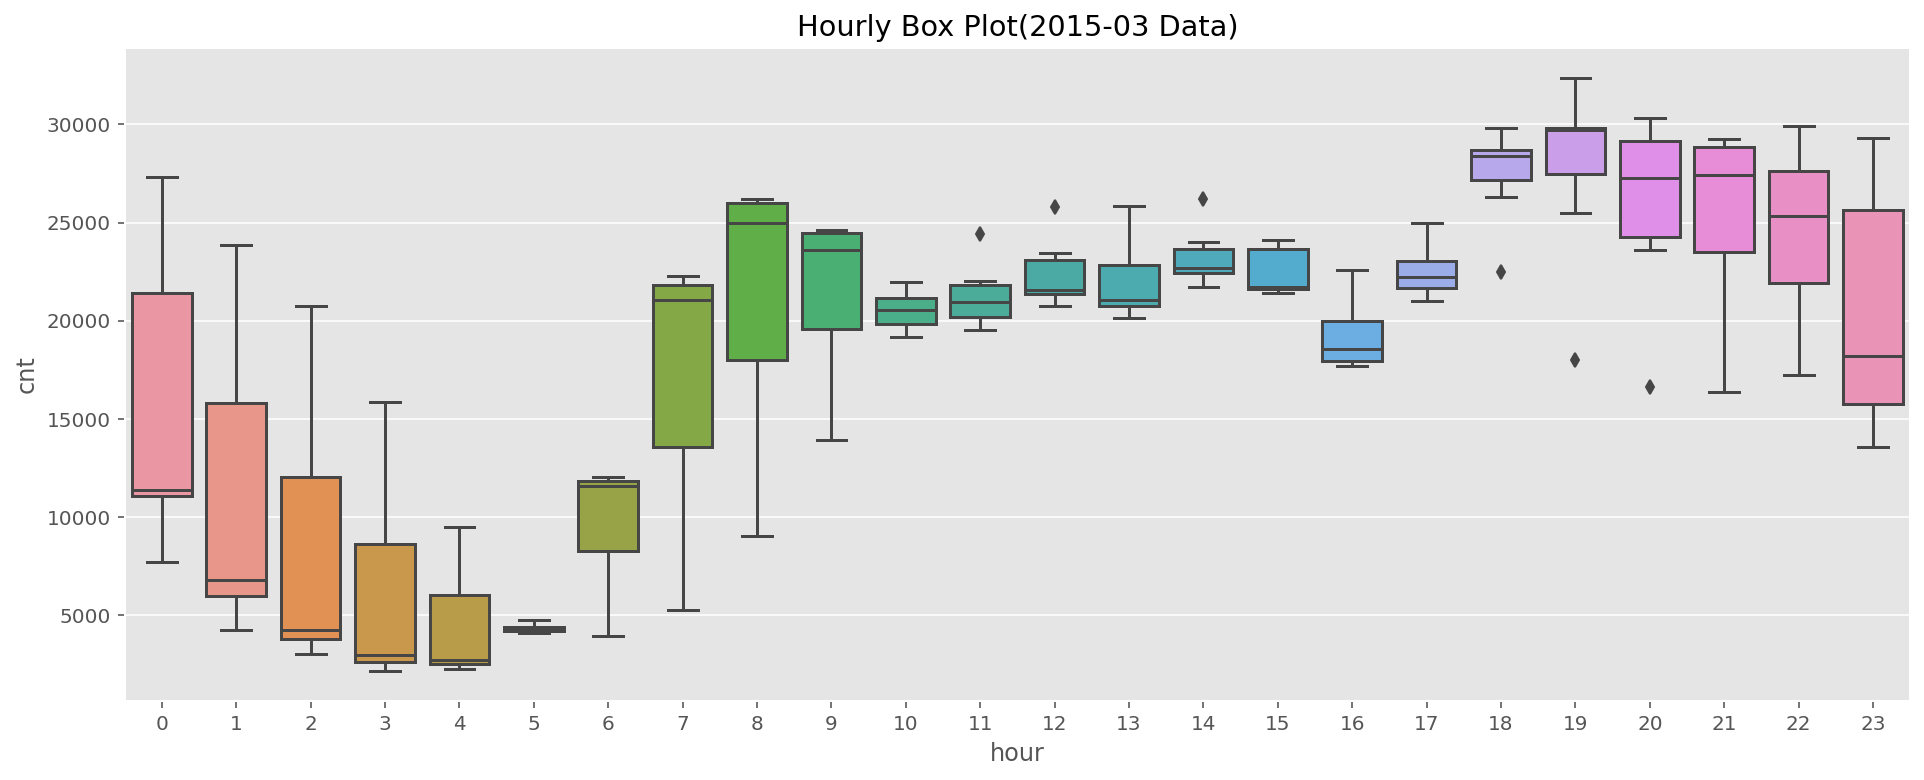

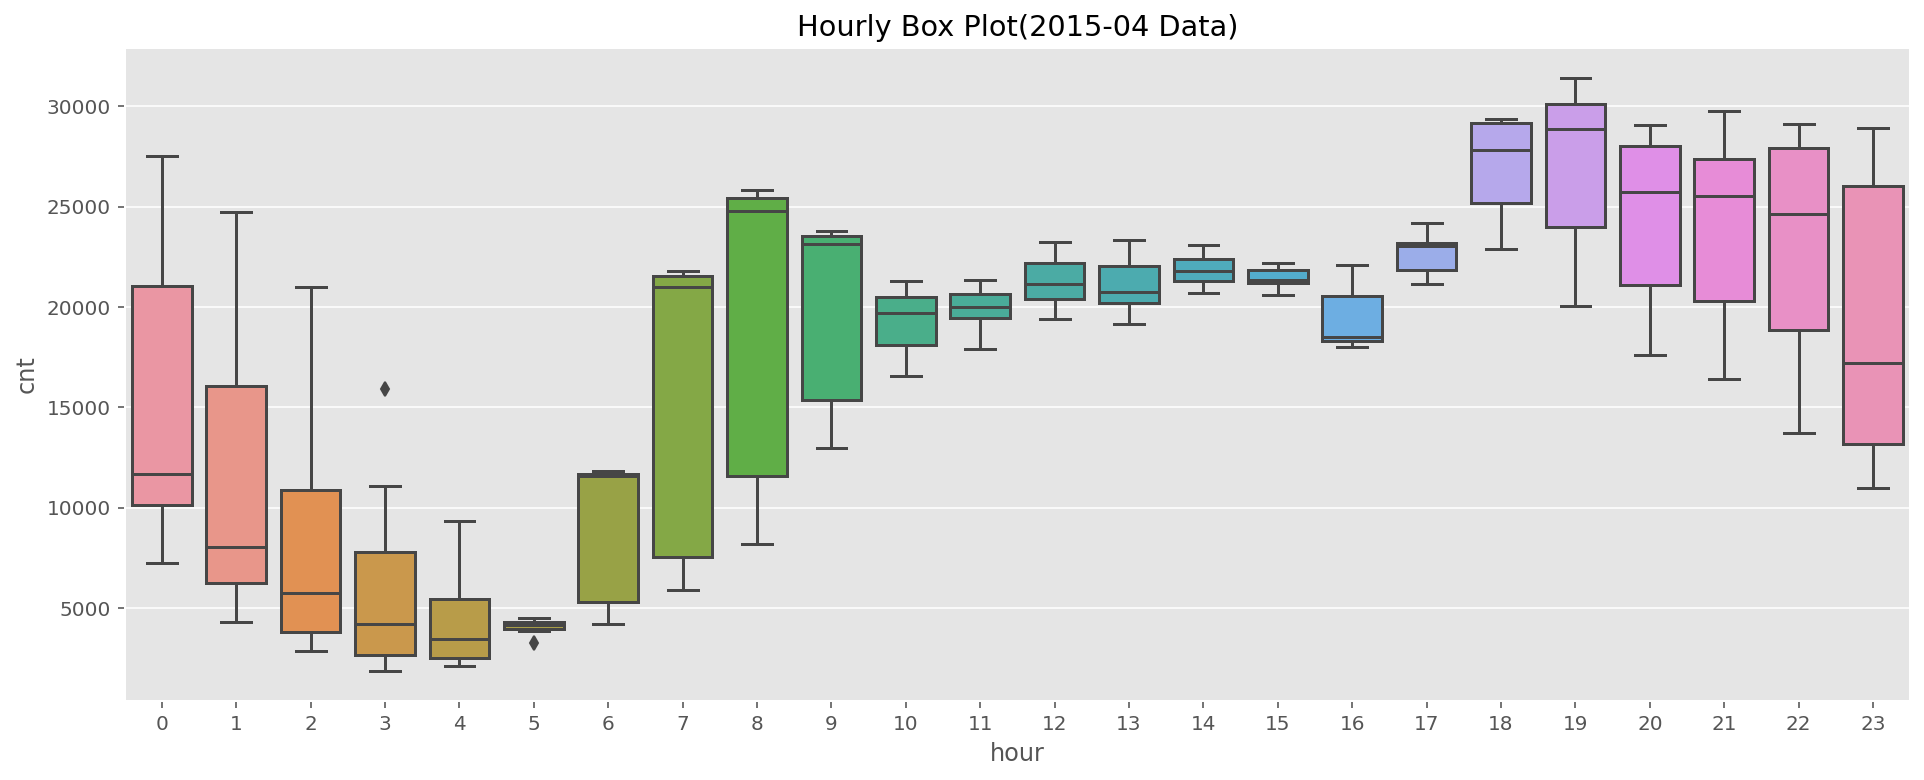

In [103]:
for week in range(1, 5):
    visualize_hourly_boxplot_by_weeknum(df, 'cnt', week)

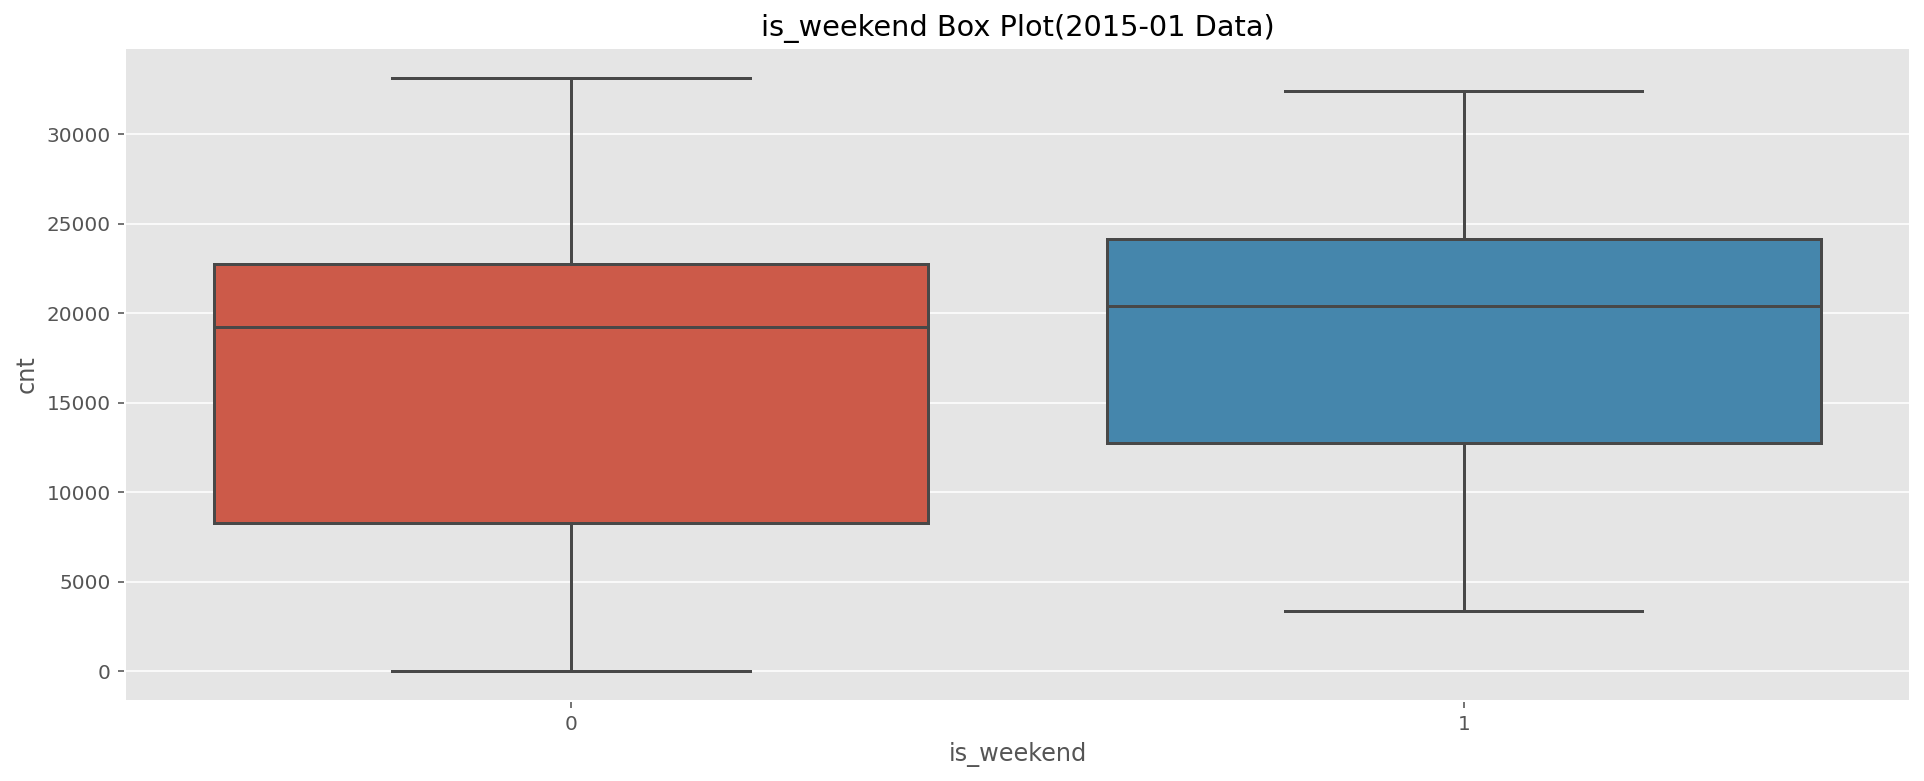

In [104]:
plt.figure(figsize=(16, 6));
sns.boxplot(x='is_weekend', y='cnt', data=df);
plt.title("is_weekend Box Plot(2015-01 Data)");

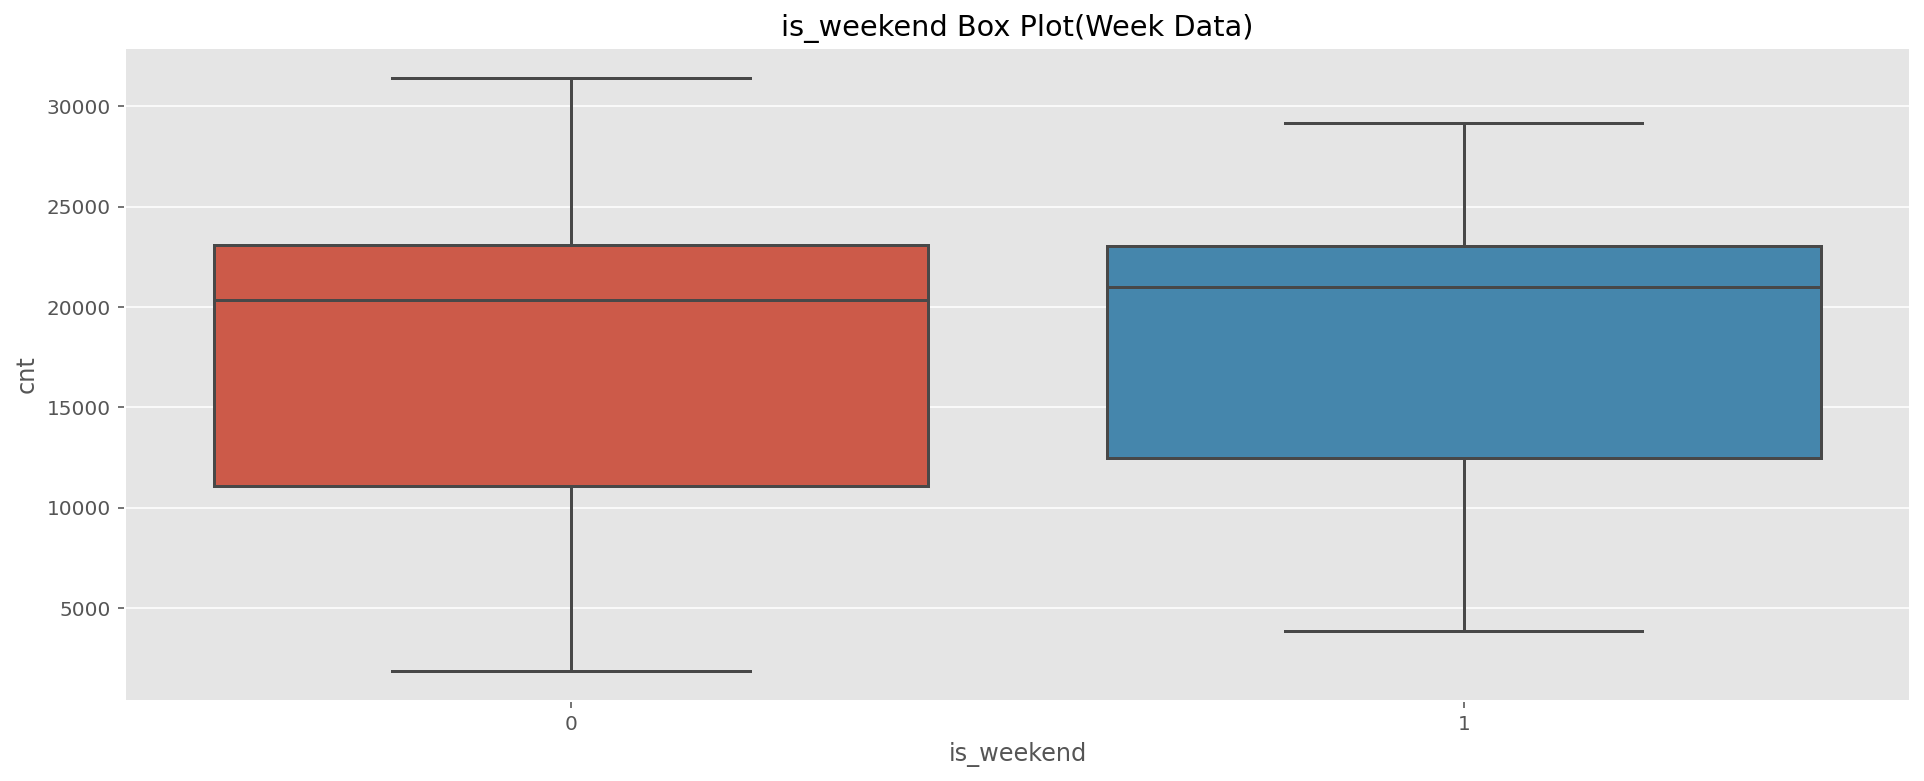

In [105]:
plt.figure(figsize=(16, 6));
sns.boxplot(x='is_weekend', y='cnt', data=df[df['weeknum']==4]);
plt.title("is_weekend Box Plot(Week Data)");

### Viloinplot
- [Violin Plots 101](https://mode.com/blog/violin-plot-examples)

In [106]:
weekday_dict = {
    0:"Monday",
    1:"Tuesday",
    2:"Wednesday",
    3:"Thursday",
    4:"Friday",
    5:"Saturday",
    6:"Sunday"
}

In [107]:
def visualize_violinplot_by_weekday(df, y, weekday):
    plt.figure(figsize=(16, 6));
    sns.violinplot(x="hour", y=y, hue="weekday", 
                   data=df[df['weekday'] == weekday][['hour', 'weekday', y]],
                   inner="quart");    
    plt.title(f"{weekday_dict[weekday]}'s hourly violinplot {y}(2015-01 Data)")

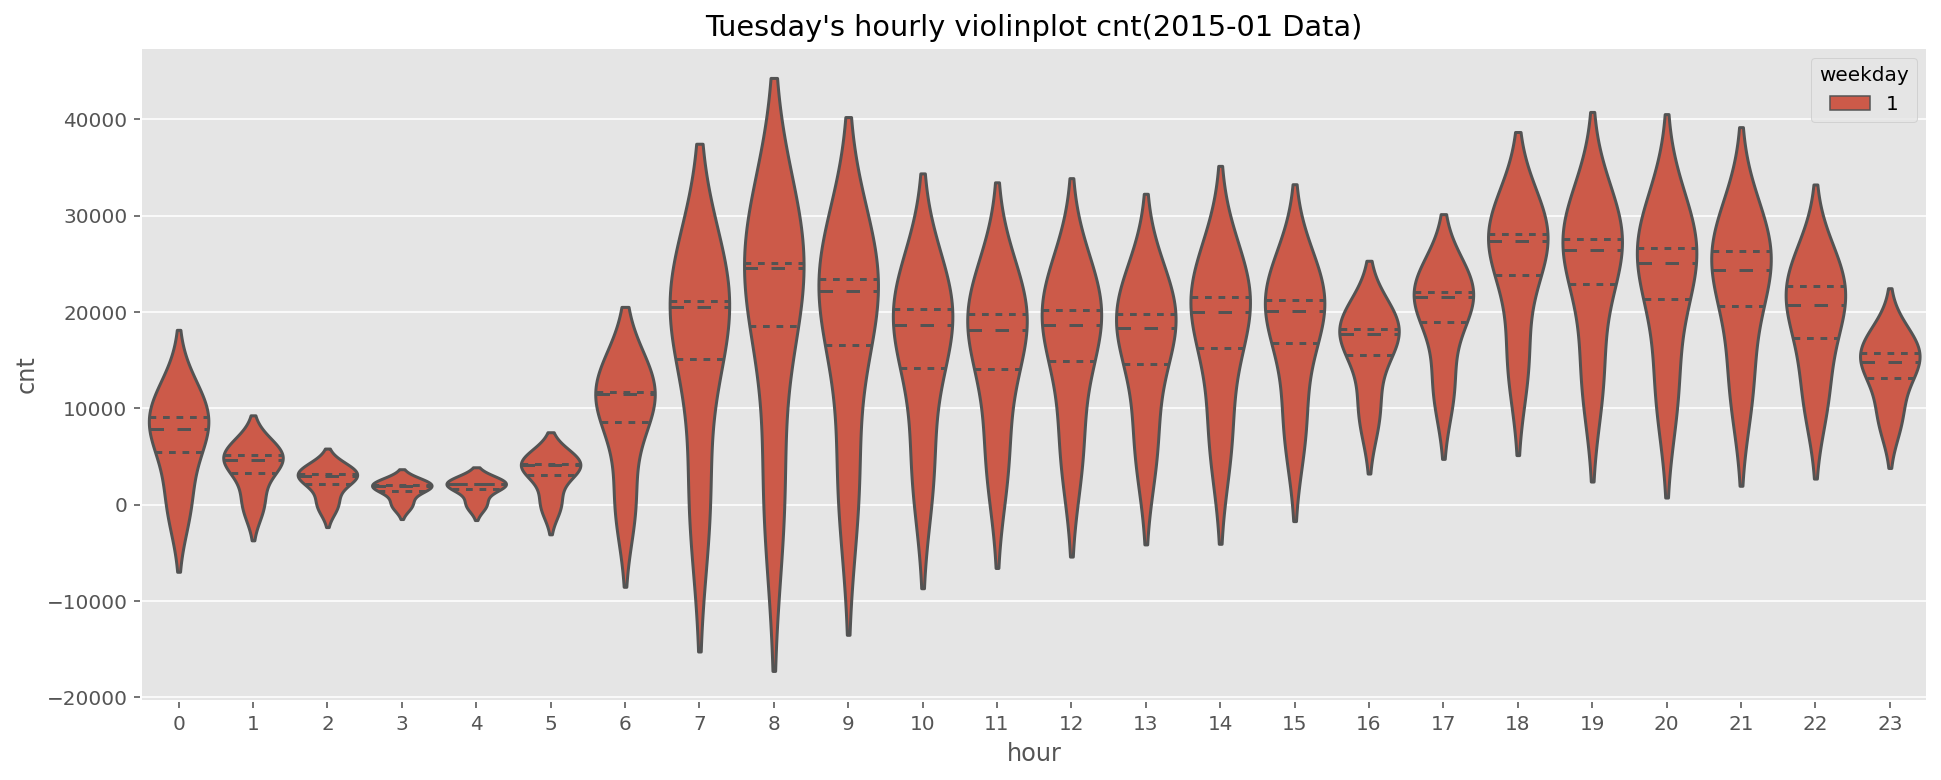

In [108]:
visualize_violinplot_by_weekday(df, 'cnt', 1)

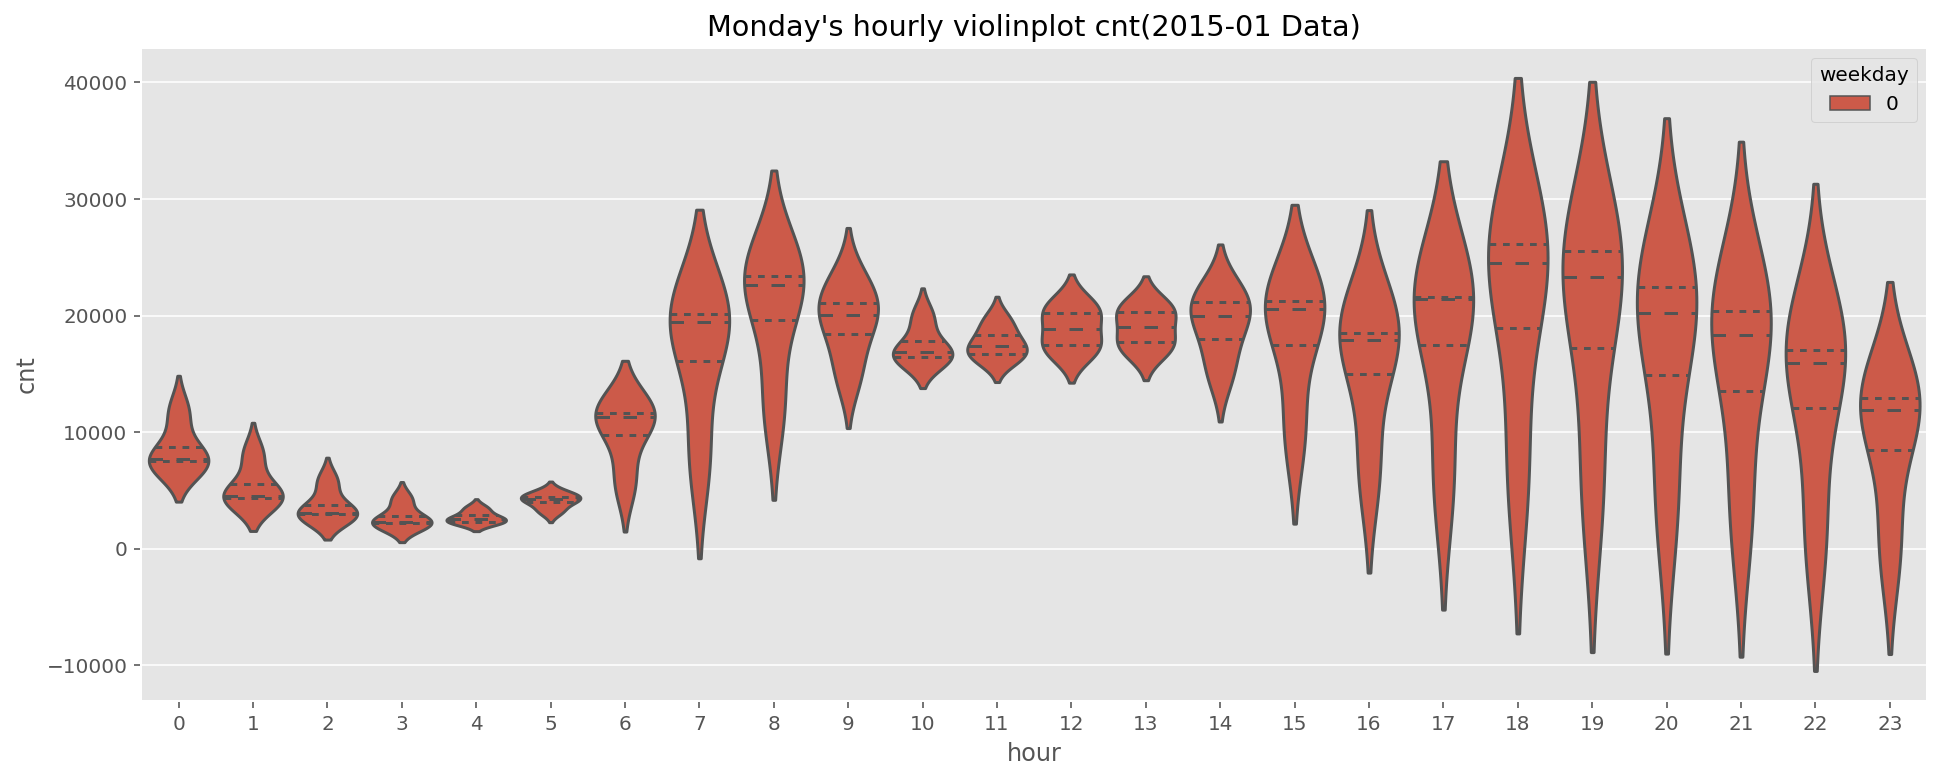

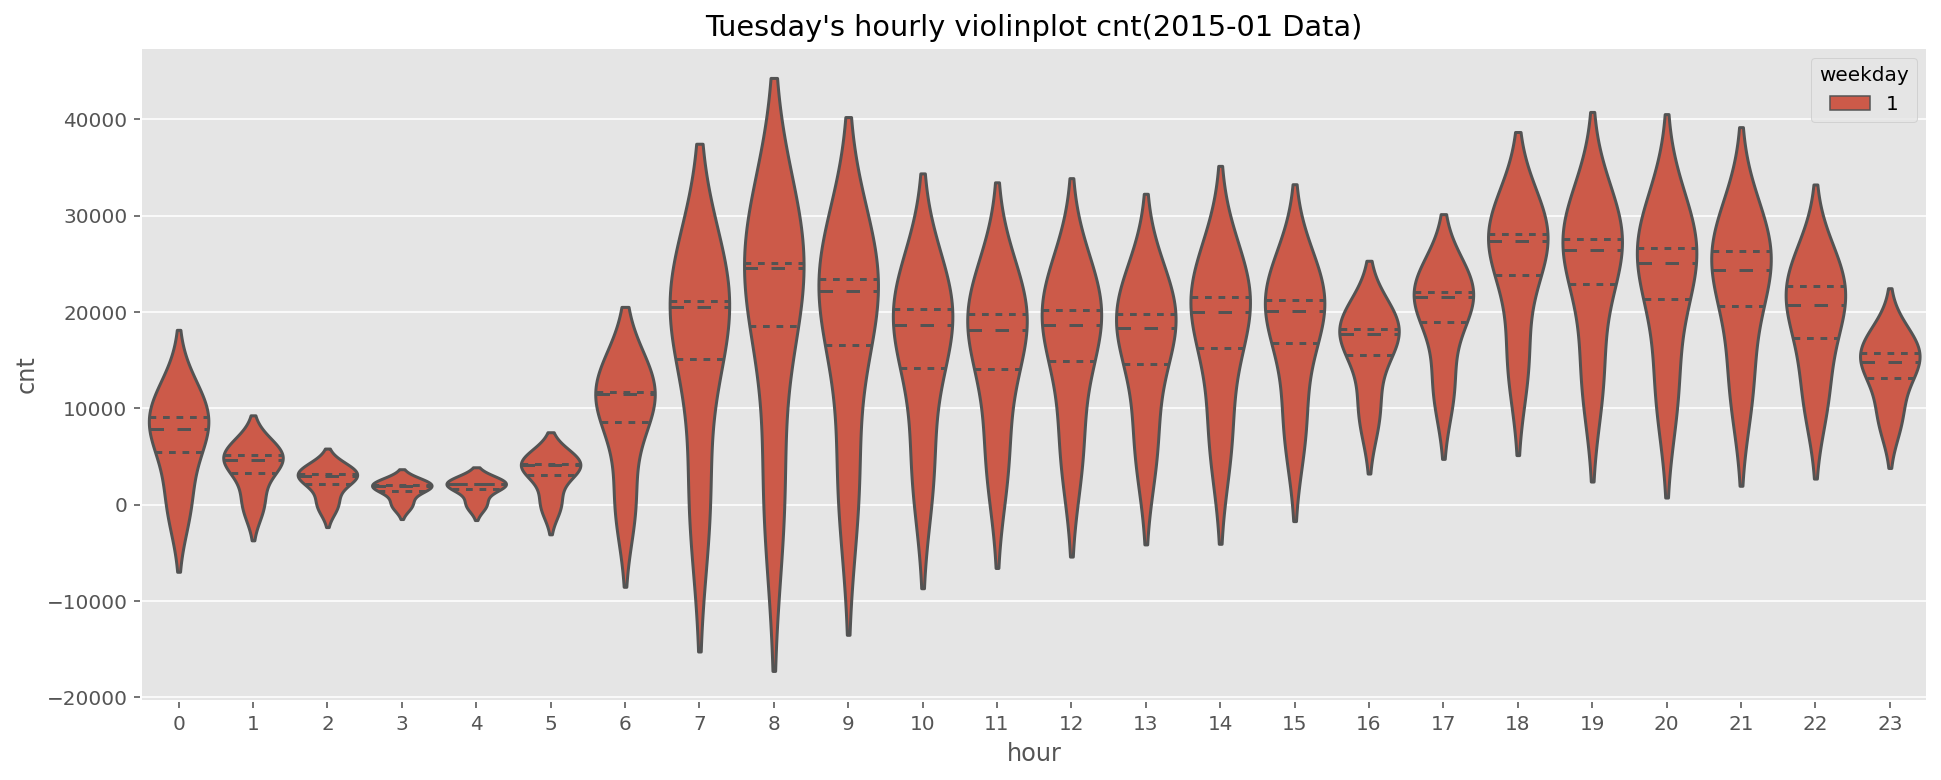

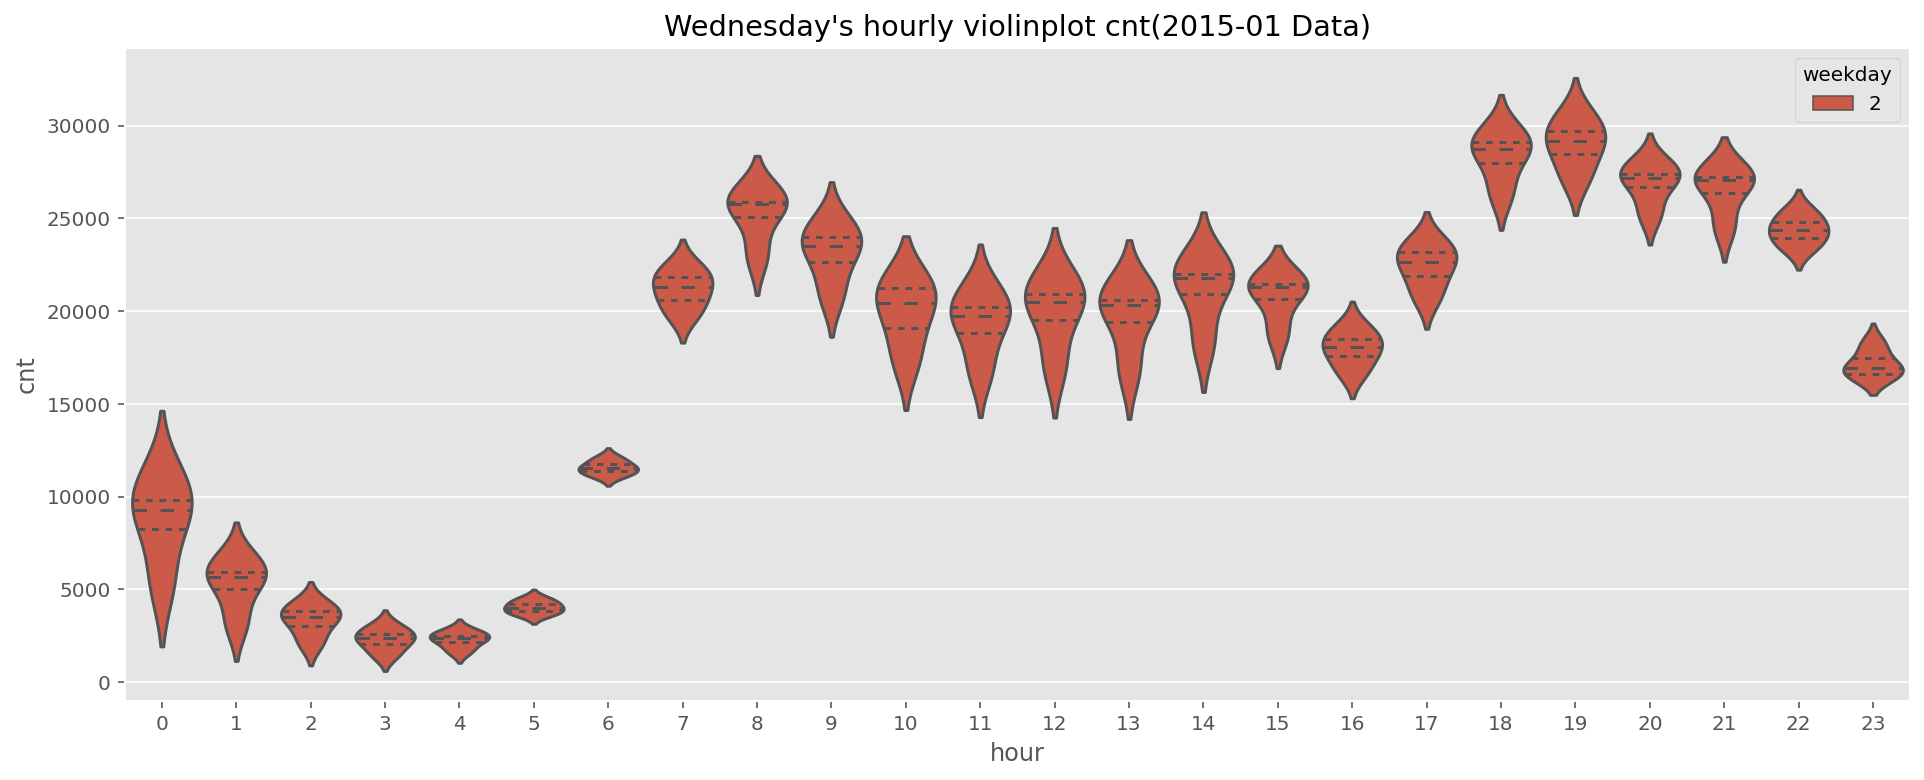

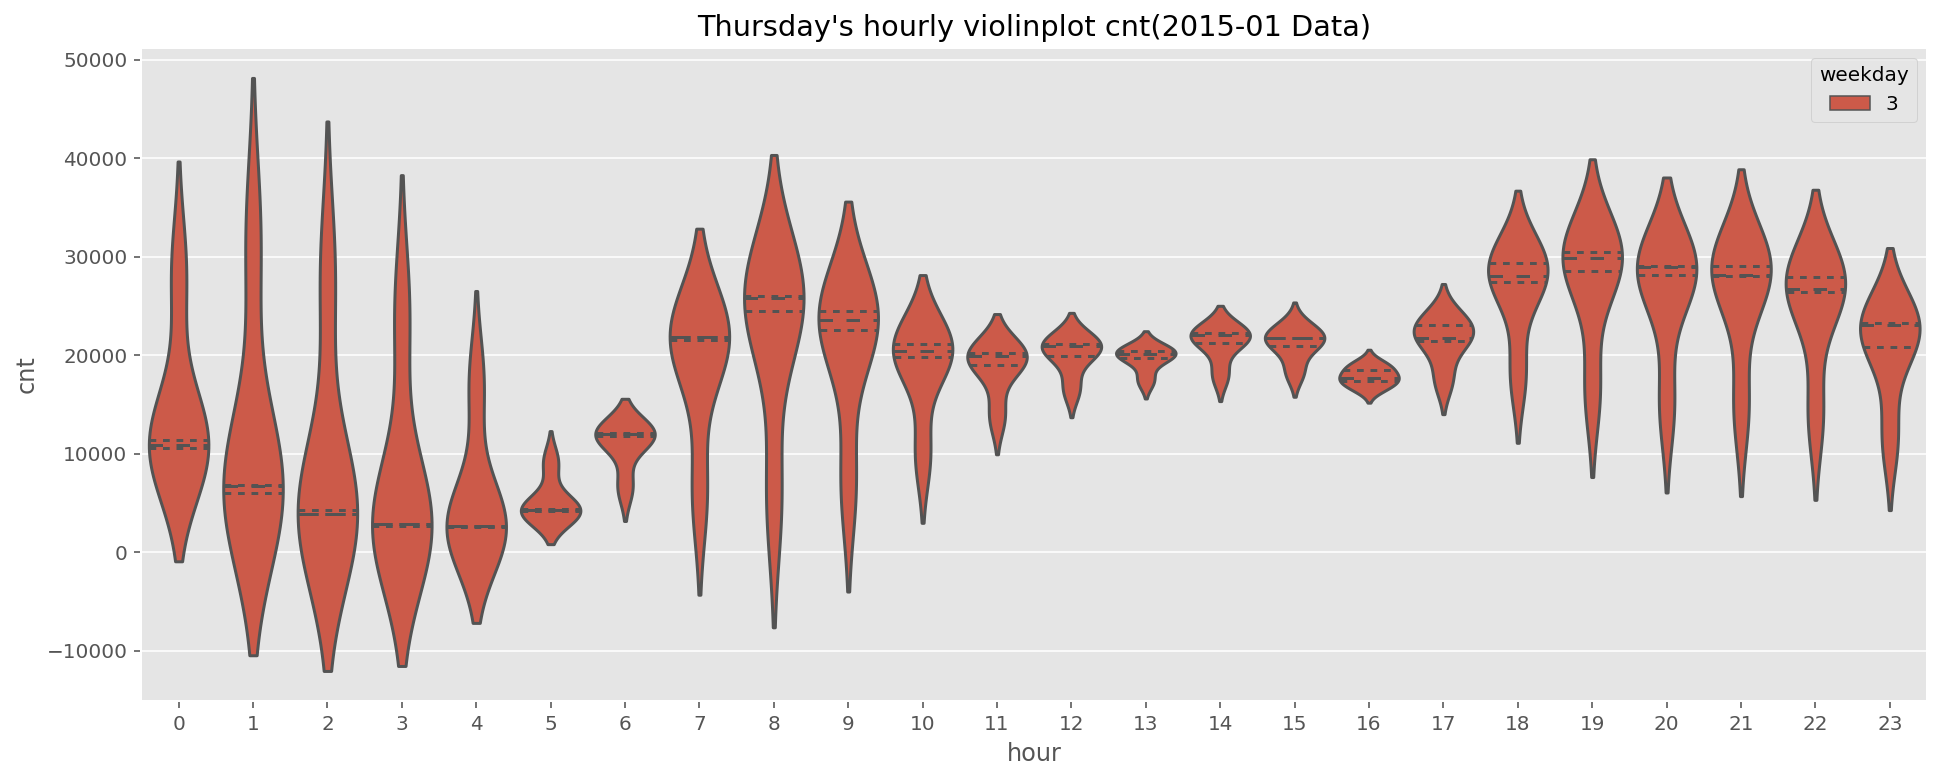

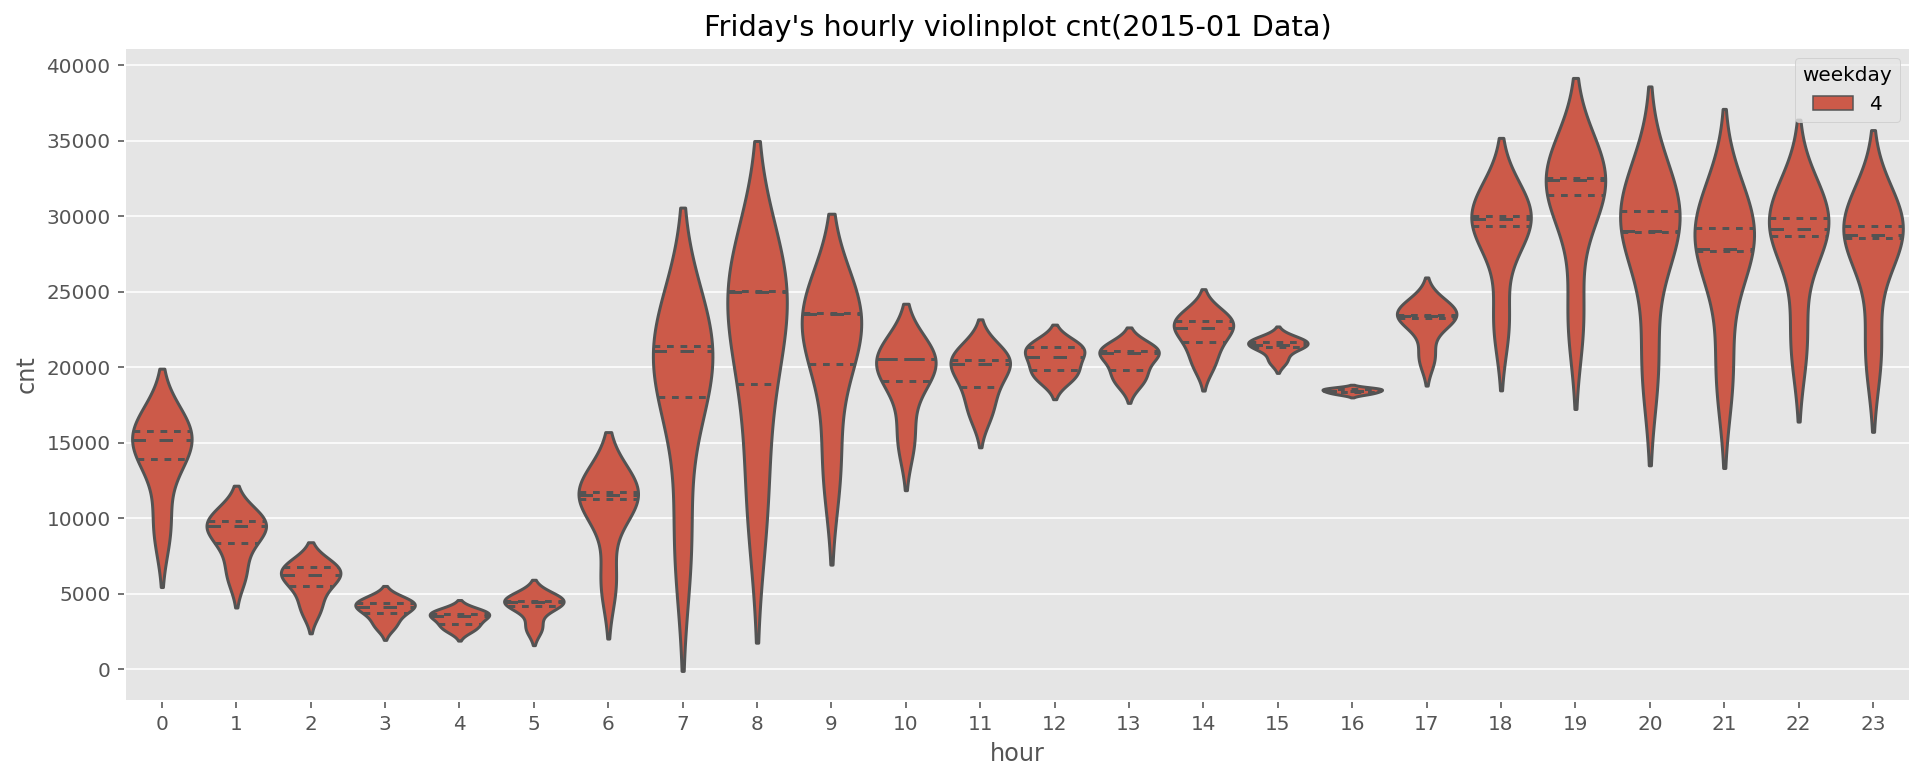

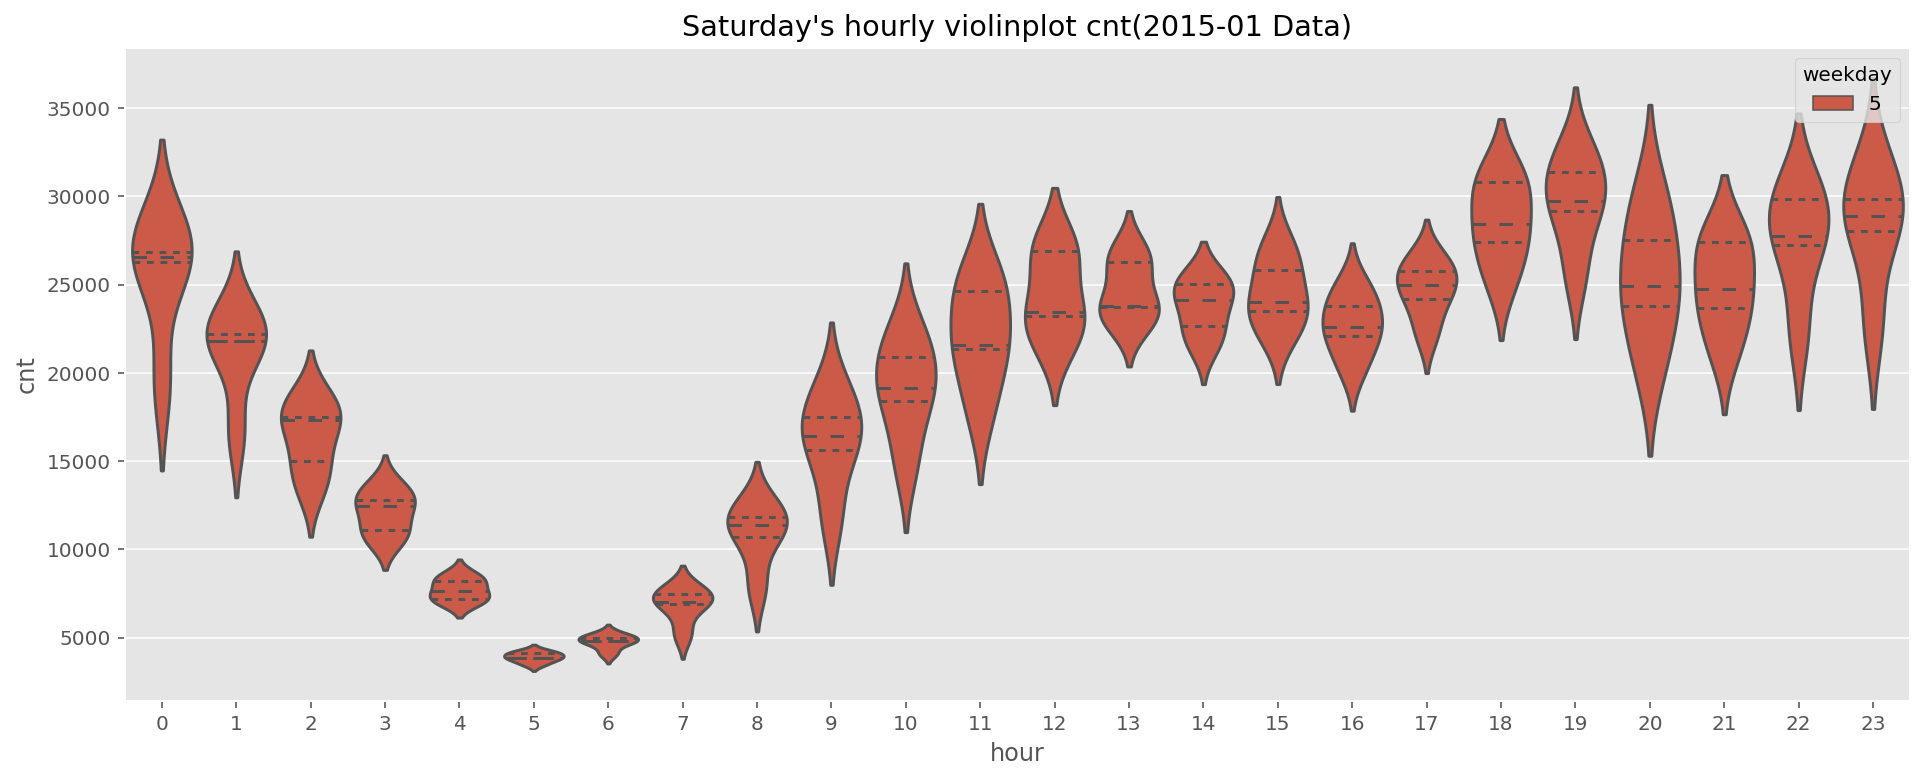

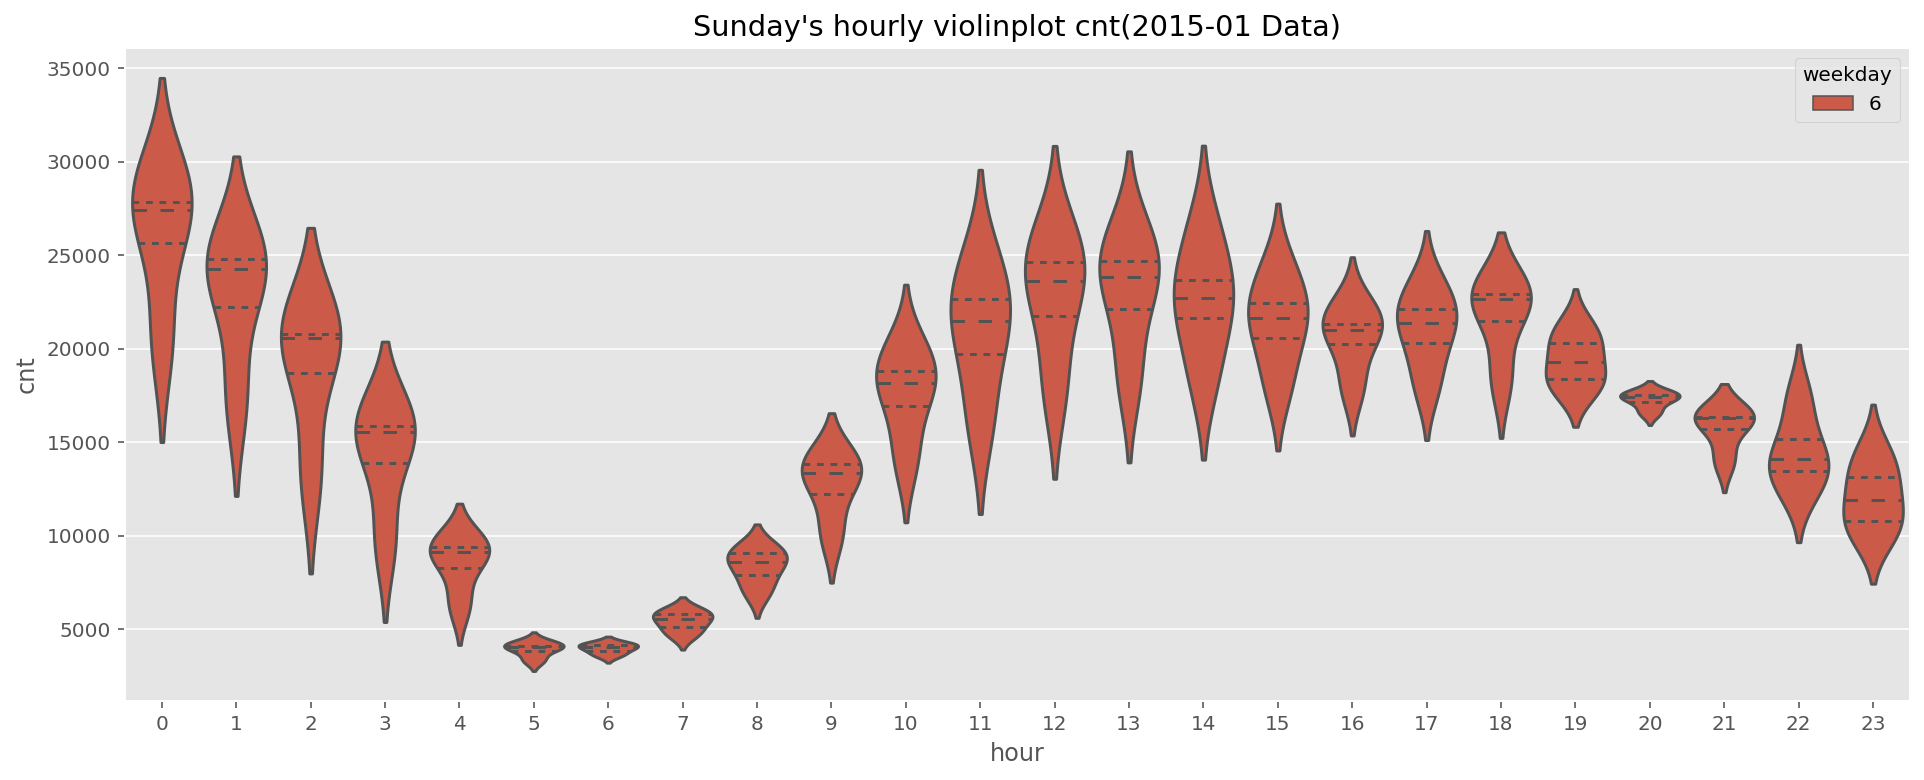

In [109]:
for weekday in range(0, 7):
    visualize_violinplot_by_weekday(df, 'cnt', weekday)

### trip_distance distribution

In [112]:
%%time

trip_distance_query = """
SELECT 
    floor(trip_distance/30)*30 as bucket_floor,
    count(*) as count
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2015` 
WHERE EXTRACT(MONTH from pickup_datetime) = 1
GROUP BY bucket_floor
order by bucket_floor
"""


trip_distance_query_log = """
SELECT 
    floor(trip_distance/30)*30 as bucket_floor,
    log10(count(*)) as count
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2015` 
WHERE EXTRACT(MONTH from pickup_datetime) = 1
GROUP BY bucket_floor
order by bucket_floor
"""

distance_df = client.query(trip_distance_query).to_dataframe()
distance_log_df = client.query(trip_distance_query_log).to_dataframe()

CPU times: user 122 ms, sys: 15.9 ms, total: 138 ms
Wall time: 9.06 s


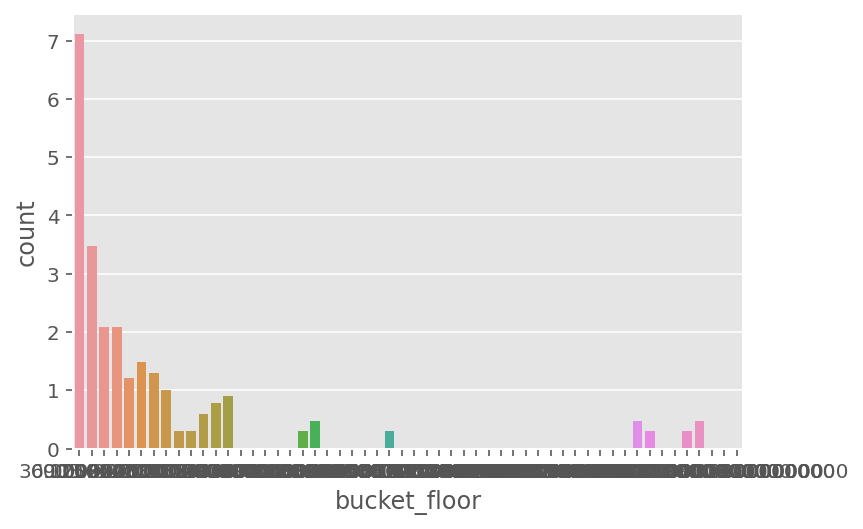

In [113]:
sns.barplot(x=distance_log_df['bucket_floor'], y=distance_log_df['count']);

In [114]:
distance_df.head()

,bucket_floor,count
0,0E-9,12737615
1,30.000000000,3027
2,60.000000000,120
3,90.000000000,124
4,120.000000000,16


In [118]:
distance_df.set_index('bucket_floor').iplot(kind='bar')

### long/short-distance demand
- Long/Short Distance Demand by Time Zone

In [119]:
%%time

short_trip_query = """
SELECT 
  EXTRACT(HOUR FROM pickup_datetime) as pickup_hour,
  EXTRACT(HOUR FROM dropoff_datetime) as dropoff_hour,
  count(*) as count
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2015` 
WHERE EXTRACT(MONTH from pickup_datetime) = 1
and trip_distance < 30
GROUP BY pickup_hour, dropoff_hour
"""

short_trip_df = client.query(short_trip_query).to_dataframe()

CPU times: user 57.5 ms, sys: 8.64 ms, total: 66.1 ms
Wall time: 4.21 s


In [121]:
%%time

long_trip_query = """
SELECT 
  EXTRACT(HOUR FROM pickup_datetime) as pickup_hour,
  EXTRACT(HOUR FROM dropoff_datetime) as dropoff_hour,
  count(*) as count
FROM `bigquery-public-data.new_york_taxi_trips.tlc_yellow_trips_2015`
WHERE EXTRACT(MONTH from pickup_datetime) = 1
and trip_distance >= 30
GROUP BY pickup_hour, dropoff_hour

"""

long_trip_df = client.query(long_trip_query).to_dataframe()

CPU times: user 52.8 ms, sys: 3.08 ms, total: 55.8 ms
Wall time: 3.52 s


In [123]:
short_trip_df.head()

,pickup_hour,dropoff_hour,count
0,13,14,133497
1,3,3,163119
2,22,23,128969
3,9,0,102
4,19,0,103


In [124]:
long_trip_df.head(15)

,pickup_hour,dropoff_hour,count
0,2,3,60
1,19,20,104
2,8,8,11
3,13,16,11
4,10,11,96
5,8,9,74
6,21,21,37
7,15,19,3
8,11,17,1
9,14,17,6


In [125]:
trip_df = short_trip_df.merge(long_trip_df, on=["pickup_hour", "dropoff_hour"], suffixes=["_short", "_long"]) \
                       .rename(columns={"count_short":"short_trips", "count_long":"long_trips"})

In [126]:
trip_df.head()

,pickup_hour,dropoff_hour,short_trips,long_trips
0,13,14,133497,114
1,3,3,163119,14
2,22,23,128969,98
3,19,0,103,1
4,10,14,9,1


In [127]:
trip_df_pickup = trip_df.groupby(["pickup_hour"], as_index=False).agg({'short_trips':'sum', 'long_trips':'sum'}) \
                                                                      .sort_values(by="pickup_hour")
trip_df_dropoff = trip_df.groupby(["dropoff_hour"], as_index=False).agg({'short_trips':'sum', 'long_trips':'sum'}) \
                                                                      .sort_values(by="dropoff_hour")

In [128]:
trip_df_pickup.head()

,pickup_hour,short_trips,long_trips
0,0,469598,146
1,1,354783,93
2,2,267794,89
3,3,198319,59
4,4,143007,62


In [129]:
def plt_clock(ax, radii, title, color):
    N = 24
    bottom = 2

    # Create theta for 24 hours
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

    # Specify each bin width of the plot
    width = 2*np.pi / N
    
    bars = ax.bar(theta, radii, width=width, bottom=bottom, color=color, edgecolor="#999999")

    # Set label clockwise and start from the top
    ax.set_theta_zero_location("N")
    # Clockwise setting
    ax.set_theta_direction(-1)

    # label settings
    ax.set_xticks(theta)
    ticks = ["{}:00".format(x) for x in range(24)]
    ax.set_xticklabels(ticks)
    ax.set_title(title)

In [131]:
def diff_short_long_trip_on_time(trip_df_pickup, trip_df_dropoff):
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,18))

    # The first picture of 2 and 2.
    ax = plt.subplot(2,2,1, polar=True)
    # Histogram plot for each bin of 24 hours
    radii = np.array(trip_df_pickup['short_trips'].tolist(), dtype="int64")
    title = "Pickup Time for Short Trips"
    plt_clock(ax, radii, title, "#dc143c")

    # The second picture of 2 and 2
    ax = plt.subplot(2,2,2, polar=True)
    # Histogram plot for each bin of 24 hours
    radii = np.array(trip_df_pickup['long_trips'].tolist(), dtype="int64")
    title = "Pickup Time for Long Trips"
    plt_clock(ax, radii, title, "#56B4E9")

    ax = plt.subplot(2,2,3, polar=True)
    radii = np.array(trip_df_dropoff['short_trips'].tolist(), dtype="int64")
    title = "Dropoff Time for Short Trips"
    plt_clock(ax, radii, title, "#dc143c")

    ax = plt.subplot(2,2,4, polar=True)
    radii = np.array(trip_df_dropoff['long_trips'].tolist(), dtype="int64")
    title = "Dropoff Time for Long Trips"
    plt_clock(ax, radii, title, "#56B4E9")

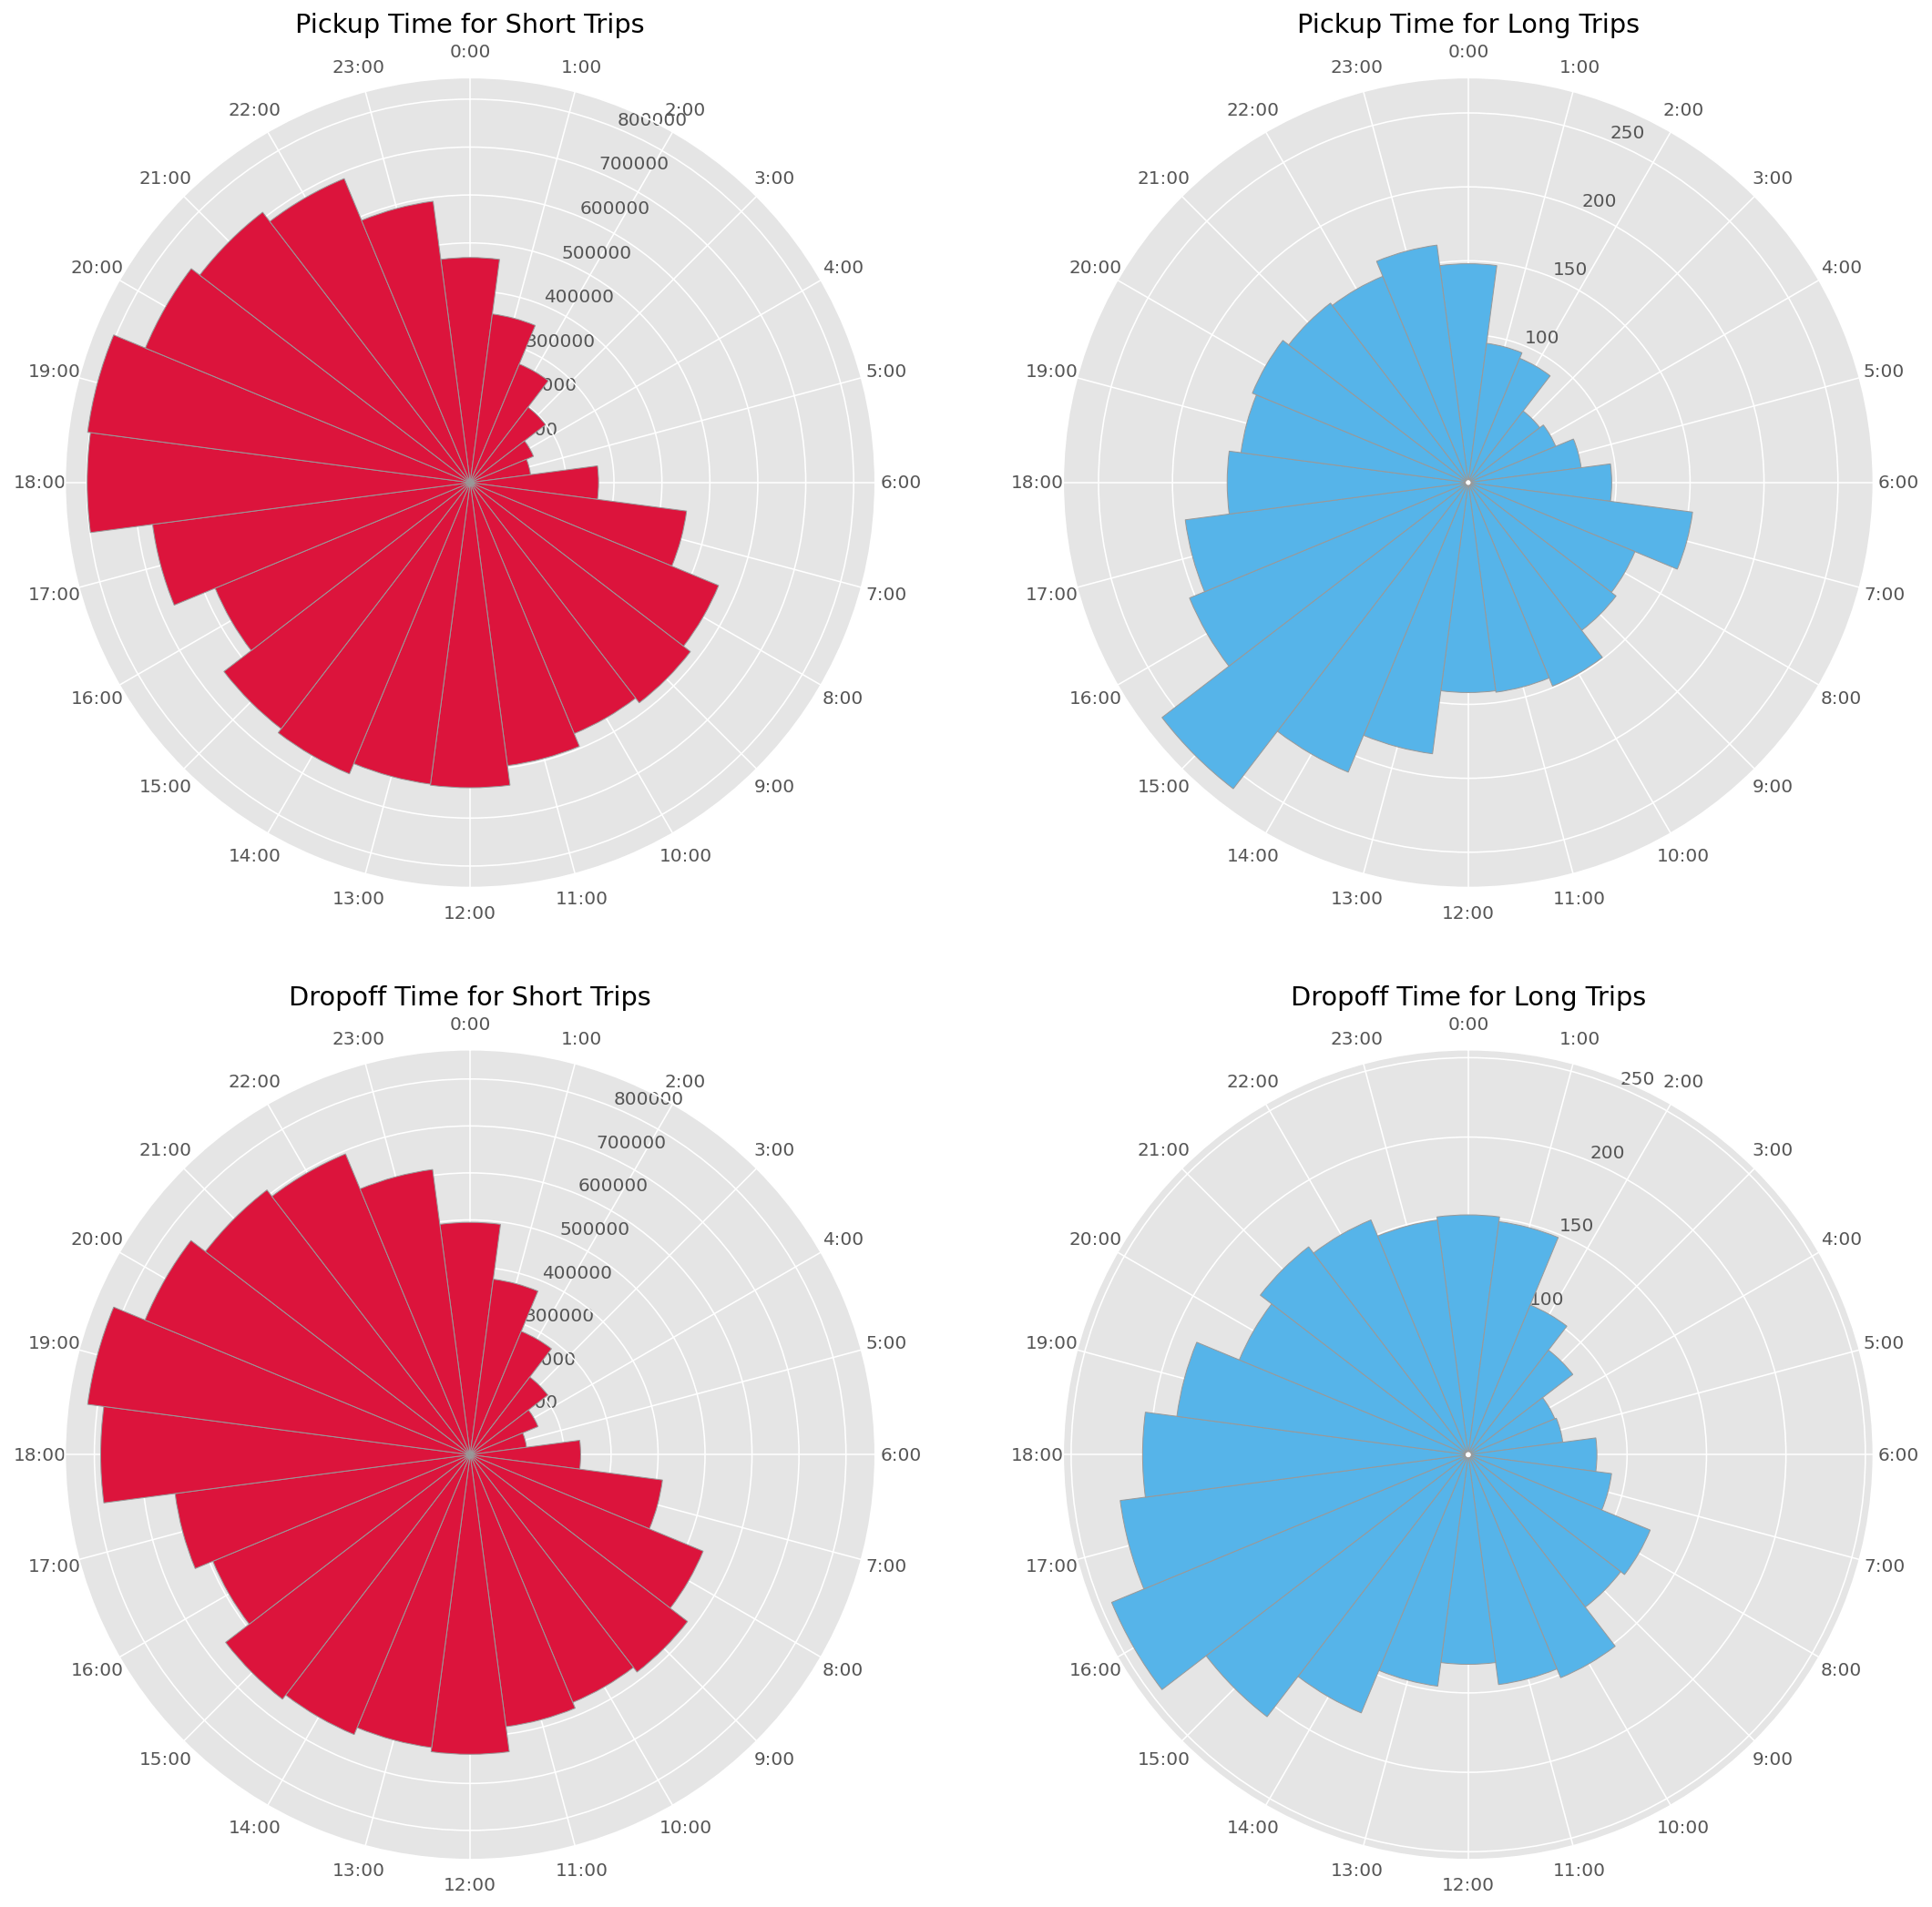

In [132]:
diff_short_long_trip_on_time(trip_df_pickup, trip_df_dropoff)

- Peak time.
  - Short trip
    - 18:00 ~ 22:00
  - Long trip
    - 13:00 ~ 15:30?